## Background and Context

The Thera bank recently saw a steep decline in the number of users of their credit card, credit cards are a good source of income for banks because of different kinds of fees charged by the banks like annual fees, balance transfer fees, and cash advance fees, late payment fees, foreign transaction fees, and others. Some fees are charged to every user irrespective of usage, while others are charged under specified circumstances.

Customers’ leaving credit cards services would lead bank to loss, so the bank wants to analyze the data of customers and identify the customers who will leave their credit card services and reason for same – so that bank could improve upon those areas

You as a Data scientist at Thera bank need to come up with a classification model that will help the bank improve their services so that customers do not renounce their credit cards.

## Objective
1. Explore and visualize the dataset.
2. Build a classification model to predict if the customer is going to churn or not
3. Optimize the model using appropriate techniques
4. Generate a set of insights and recommendations that will help the bank

### Data Dictionary
* CLIENTNUM: Client number. Unique identifier for the customer holding the account
* Attrition_Flag: Internal event (customer activity) variable - if the account is closed then "Attrited Customer" else "Existing Customer"
* Customer_Age: Age in Years
* Gender: Gender of the account holder
* Dependent_count: Number of dependents
* Education_Level:  Educational Qualification of the account holder - Graduate, High School, Unknown, Uneducated, College(refers to a college student), Post-Graduate, Doctorate.
* Marital_Status: Marital Status of the account holder
* Income_Category: Annual Income Category of the account holder
* Card_Category: Type of Card
* Months_on_book: Period of relationship with the bank
* Total_Relationship_Count: Total no. of products held by the customer
* Months_Inactive_12_mon: No. of months inactive in the last 12 months
* Contacts_Count_12_mon: No. of Contacts between the customer and bank in the last 12 months
* Credit_Limit: Credit Limit on the Credit Card
* Total_Revolving_Bal: The balance that carries over from one month to the next is the revolving balance
* Avg_Open_To_Buy: Open to Buy refers to the amount left on the credit card to use (Average of last 12 months)
* Total_Trans_Amt: Total Transaction Amount (Last 12 months)
* Total_Trans_Ct: Total Transaction Count (Last 12 months)
* Total_Ct_Chng_Q4_Q1: Ratio of the total transaction count in 4th quarter and the total transaction count in 1st quarter
* Total_Amt_Chng_Q4_Q1: Ratio of the total transaction amount in 4th quarter and the total transaction amount in 1st quarter
* Avg_Utilization_Ratio: Represents how much of the available credit the customer spent

## Importing necessary packages and data

In [1]:
#EDA packages
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")

# To impute missing values
from sklearn.impute import KNNImputer
from sklearn.pipeline import Pipeline, make_pipeline

# To tune model, get different metric scores and split data
from sklearn.model_selection import GridSearchCV,RandomizedSearchCV
from sklearn.model_selection import train_test_split, StratifiedKFold, cross_val_score
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score,precision_score,recall_score
from sklearn import metrics

#Logistic regression and stats model packages
from sklearn.linear_model import LogisticRegression
import statsmodels.stats.api as sms
from statsmodels.stats.outliers_influence import variance_inflation_factor
import statsmodels.api as sm


#Imbalance data
#!pip install imblearn
from imblearn.over_sampling import SMOTE
from imblearn.under_sampling import RandomUnderSampler

# Libraries to import decision tree classifier and different ensemble classifiers
from sklearn.ensemble import BaggingClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import AdaBoostClassifier, GradientBoostingClassifier
from xgboost import XGBClassifier
from sklearn.tree import DecisionTreeClassifier


In [2]:
data = pd.read_csv("BankChurners.csv")

### Checking shape and first and last 5 rows of data

In [3]:
data.shape

(10127, 21)

- There are 10127 rows in the dataset with 21 different features

In [4]:
df = data.copy()

In [5]:
df.head()

,CLIENTNUM,Attrition_Flag,Customer_Age,Gender,Dependent_count,Education_Level,Marital_Status,Income_Category,Card_Category,Months_on_book,...,Months_Inactive_12_mon,Contacts_Count_12_mon,Credit_Limit,Total_Revolving_Bal,Avg_Open_To_Buy,Total_Amt_Chng_Q4_Q1,Total_Trans_Amt,Total_Trans_Ct,Total_Ct_Chng_Q4_Q1,Avg_Utilization_Ratio
0,768805383,Existing Customer,45,M,3,High School,Married,$60K - $80K,Blue,39,...,1,3,12691.0,777,11914.0,1.335,1144,42,1.625,0.061
1,818770008,Existing Customer,49,F,5,Graduate,Single,Less than $40K,Blue,44,...,1,2,8256.0,864,7392.0,1.541,1291,33,3.714,0.105
2,713982108,Existing Customer,51,M,3,Graduate,Married,$80K - $120K,Blue,36,...,1,0,3418.0,0,3418.0,2.594,1887,20,2.333,0.000
3,769911858,Existing Customer,40,F,4,High School,Unknown,Less than $40K,Blue,34,...,4,1,3313.0,2517,796.0,1.405,1171,20,2.333,0.760
4,709106358,Existing Customer,40,M,3,Uneducated,Married,$60K - $80K,Blue,21,...,1,0,4716.0,0,4716.0,2.175,816,28,2.500,0.000


In [6]:
df.tail()

,CLIENTNUM,Attrition_Flag,Customer_Age,Gender,Dependent_count,Education_Level,Marital_Status,Income_Category,Card_Category,Months_on_book,...,Months_Inactive_12_mon,Contacts_Count_12_mon,Credit_Limit,Total_Revolving_Bal,Avg_Open_To_Buy,Total_Amt_Chng_Q4_Q1,Total_Trans_Amt,Total_Trans_Ct,Total_Ct_Chng_Q4_Q1,Avg_Utilization_Ratio
10122,772366833,Existing Customer,50,M,2,Graduate,Single,$40K - $60K,Blue,40,...,2,3,4003.0,1851,2152.0,0.703,15476,117,0.857,0.462
10123,710638233,Attrited Customer,41,M,2,Unknown,Divorced,$40K - $60K,Blue,25,...,2,3,4277.0,2186,2091.0,0.804,8764,69,0.683,0.511
10124,716506083,Attrited Customer,44,F,1,High School,Married,Less than $40K,Blue,36,...,3,4,5409.0,0,5409.0,0.819,10291,60,0.818,0.000
10125,717406983,Attrited Customer,30,M,2,Graduate,Unknown,$40K - $60K,Blue,36,...,3,3,5281.0,0,5281.0,0.535,8395,62,0.722,0.000
10126,714337233,Attrited Customer,43,F,2,Graduate,Married,Less than $40K,Silver,25,...,2,4,10388.0,1961,8427.0,0.703,10294,61,0.649,0.189


### Checking the datatypes of columns

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10127 entries, 0 to 10126
Data columns (total 21 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   CLIENTNUM                 10127 non-null  int64  
 1   Attrition_Flag            10127 non-null  object 
 2   Customer_Age              10127 non-null  int64  
 3   Gender                    10127 non-null  object 
 4   Dependent_count           10127 non-null  int64  
 5   Education_Level           10127 non-null  object 
 6   Marital_Status            10127 non-null  object 
 7   Income_Category           10127 non-null  object 
 8   Card_Category             10127 non-null  object 
 9   Months_on_book            10127 non-null  int64  
 10  Total_Relationship_Count  10127 non-null  int64  
 11  Months_Inactive_12_mon    10127 non-null  int64  
 12  Contacts_Count_12_mon     10127 non-null  int64  
 13  Credit_Limit              10127 non-null  float64
 14  Total_

- Clientnum is just a unique number for each customer which can be dropped as it doesnot add any value.
- Columns with object datatype needs to be converted to category
- The dataset doesnot have any missing values

### Converting object datatype to category

In [8]:
df.drop(["CLIENTNUM"], axis = 1, inplace = True)

In [9]:
catcols = df.columns[df.dtypes=="object"]
for colname in catcols:
    df[colname]= df[colname].astype("category")

In [10]:
catcols

Index(['Attrition_Flag', 'Gender', 'Education_Level', 'Marital_Status',
       'Income_Category', 'Card_Category'],
      dtype='object')

In [11]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10127 entries, 0 to 10126
Data columns (total 20 columns):
 #   Column                    Non-Null Count  Dtype   
---  ------                    --------------  -----   
 0   Attrition_Flag            10127 non-null  category
 1   Customer_Age              10127 non-null  int64   
 2   Gender                    10127 non-null  category
 3   Dependent_count           10127 non-null  int64   
 4   Education_Level           10127 non-null  category
 5   Marital_Status            10127 non-null  category
 6   Income_Category           10127 non-null  category
 7   Card_Category             10127 non-null  category
 8   Months_on_book            10127 non-null  int64   
 9   Total_Relationship_Count  10127 non-null  int64   
 10  Months_Inactive_12_mon    10127 non-null  int64   
 11  Contacts_Count_12_mon     10127 non-null  int64   
 12  Credit_Limit              10127 non-null  float64 
 13  Total_Revolving_Bal       10127 non-null  int6

- Memory usage is reduced from 1.6 MB to 1.1 MB

### Checking missing values

In [12]:
data.isnull().sum()

CLIENTNUM                   0
Attrition_Flag              0
Customer_Age                0
Gender                      0
Dependent_count             0
Education_Level             0
Marital_Status              0
Income_Category             0
Card_Category               0
Months_on_book              0
Total_Relationship_Count    0
Months_Inactive_12_mon      0
Contacts_Count_12_mon       0
Credit_Limit                0
Total_Revolving_Bal         0
Avg_Open_To_Buy             0
Total_Amt_Chng_Q4_Q1        0
Total_Trans_Amt             0
Total_Trans_Ct              0
Total_Ct_Chng_Q4_Q1         0
Avg_Utilization_Ratio       0
dtype: int64

- There are no missing values in the dataset provided.

In [13]:
df.describe(include = "all").T

,count,unique,top,freq,mean,std,min,25%,50%,75%,max
Attrition_Flag,10127,2,Existing Customer,8500,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Customer_Age,10127,NaN,NaN,NaN,46.326,8.01681,26,41,46,52,73
Gender,10127,2,F,5358,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Dependent_count,10127,NaN,NaN,NaN,2.3462,1.29891,0,1,2,3,5
Education_Level,10127,7,Graduate,3128,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Marital_Status,10127,4,Married,4687,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Income_Category,10127,6,Less than $40K,3561,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Card_Category,10127,4,Blue,9436,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Months_on_book,10127,NaN,NaN,NaN,35.9284,7.98642,13,31,36,40,56
Total_Relationship_Count,10127,NaN,NaN,NaN,3.81258,1.55441,1,3,4,5,6


**Observations:**
- There are 8500 existing customers in the dataset which is close to 85% of the dataset(Majority class)
- Customer age doesnot seems to have much outliers as mean and median are almost equal.
- There are higher number of females in the dataset, but the number of males is not that lower with 4769.
- Around 75% of the customers have less than 3 dependents with a maximum of 5 dependents for a customer.
- There are 7 levels of education in the dataset highest being Graduates which are 3128
- Married customers are higher in dataset with 4687 customers.
- There are 6 levels of income in the dataset with customers earning less than 40K being higher.
- There are 4 types of cards provided by the bank of which majority of customers have `Blue` card
- Around 50% of the customers in the dataset have atleast 3 years of relationship with the bank
- Around 50% of the customers in the dataset have atleast 4 bank products
- Over the past 12 months on an average a customer didn't use any bank products for 2 months, but there are customers who were not active for 6 months.
- Over the past 12 months on an average a customer contacted the bank 2 times, there are customers who have contacted the bank 6 times.
- There are outliers for credit limit column as the mean is almost double the median. The range of the credit limit is very high.
- Total revolving balance is on the lower side which means customers might not be using their credit limit effectively or paying off the amount spent.
- Average amount open to buy is on higher side which means either the customer is not using credit limit or paying off the amount spent. There might be a correlation with total revolving balance we will investigate further in bivariate analysis.
- Total transaction amount spent by the customer over the past 12 months has some outliers as mean is greater than median. The minimum amount is 510 and the maximum is 18484.
- Total transaction count in the last 12 months follows a normal distribution but the difference between 75th quantile and max is very large which shows the tail might be longer on right side of the distribution.

## Exploratory Data Analysis

In [14]:
for colname in catcols:
    values = df[colname].value_counts(dropna = False)/len(df[colname]) * 100
    print(values)
    print('\n')

Existing Customer    83.934038
Attrited Customer    16.065962
Name: Attrition_Flag, dtype: float64


F    52.908068
M    47.091932
Name: Gender, dtype: float64


Graduate         30.887726
High School      19.877555
Unknown          14.999506
Uneducated       14.683519
College          10.002962
Post-Graduate     5.095290
Doctorate         4.453441
Name: Education_Level, dtype: float64


Married     46.282216
Single      38.935519
Unknown      7.396070
Divorced     7.386195
Name: Marital_Status, dtype: float64


Less than $40K    35.163425
$40K - $60K       17.675521
$80K - $120K      15.157500
$60K - $80K       13.844179
Unknown           10.980547
$120K +            7.178829
Name: Income_Category, dtype: float64


Blue        93.176656
Silver       5.480399
Gold         1.145453
Platinum     0.197492
Name: Card_Category, dtype: float64




* There are unknown values in Education, MaritalStatus and Income Category, we will treat them as missing values and impute them after Exploratory data analysis.
* There is an imbalance in the distribution of dependent variable, we need to handle imbalance distribution during model building.
* There are 53% Females in the dataset given.
* Blue card is the product used by majority of customers with almost 93% of the sample.

In [15]:
numcols = df.select_dtypes([np.number]).columns
numcols

Index(['Customer_Age', 'Dependent_count', 'Months_on_book',
       'Total_Relationship_Count', 'Months_Inactive_12_mon',
       'Contacts_Count_12_mon', 'Credit_Limit', 'Total_Revolving_Bal',
       'Avg_Open_To_Buy', 'Total_Amt_Chng_Q4_Q1', 'Total_Trans_Amt',
       'Total_Trans_Ct', 'Total_Ct_Chng_Q4_Q1', 'Avg_Utilization_Ratio'],
      dtype='object')

## Univariate Analysis

In [16]:
# While doing univariate analysis of numerical variables we want to study their central tendency and dispersion.
# Let us write a function that will help us create boxplot and histogram for any input numerical variable.
# This function takes the numerical column as the input and returns the boxplots and histograms for the variable.
# Let us see if this help us write faster and cleaner code.
def histogram_boxplot(feature, figsize=(15,10), bins = None):
    """ Boxplot and histogram combined
    feature: 1-d feature array
    figsize: size of fig (default (9,8))
    bins: number of bins (default None / auto)
    """
    f2, (ax_box2, ax_hist2) = plt.subplots(nrows = 2, # Number of rows of the subplot grid= 2
                                           sharex = True, # x-axis will be shared among all subplots
                                           gridspec_kw = {"height_ratios": (.25, .75)}, 
                                           figsize = figsize 
                                           ) # creating the 2 subplots
    sns.boxplot(x=feature, ax=ax_box2, showmeans=True, color='violet') # boxplot will be created and a star will indicate the mean value of the column
    sns.histplot(x=feature, kde=F, ax=ax_hist2, bins=bins,palette="winter") if bins else sns.histplot(x=feature, kde=False, ax=ax_hist2) # For histogram
    ax_hist2.axvline(np.mean(feature), color='green', linestyle='--') # Add mean to the histogram
    ax_hist2.axvline(np.median(feature), color='red', linestyle='-') # Add median to the histograma

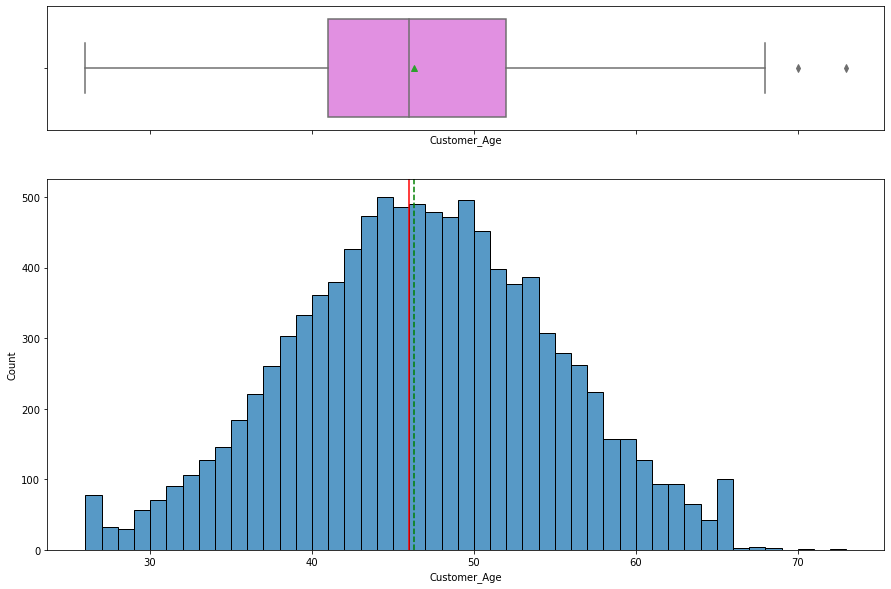

In [17]:
histogram_boxplot(df["Customer_Age"])

- Age of the customer follows a normal distribution ranging from 26 years to 73 years

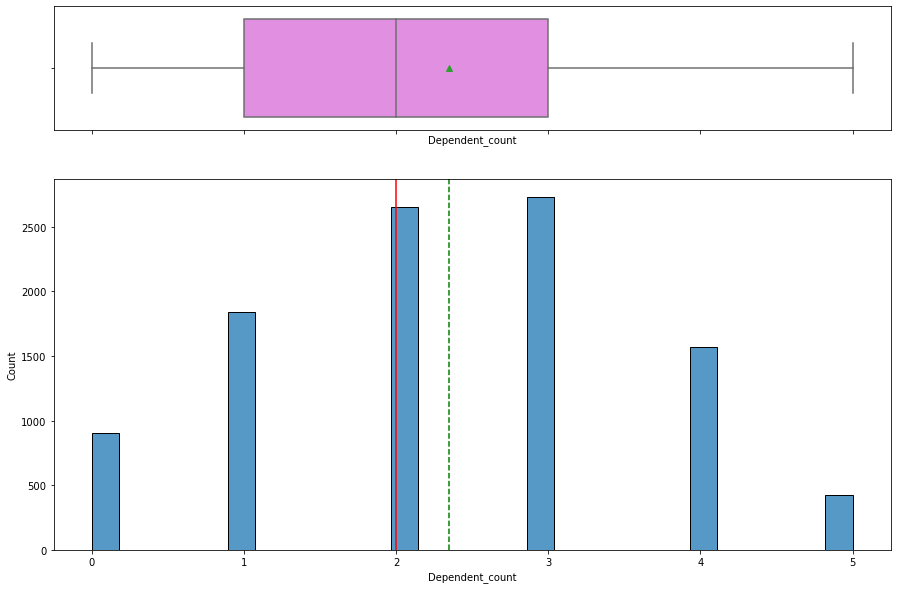

In [18]:
histogram_boxplot(df["Dependent_count"])

* The distribution for dependent count is normal with a majority of 3 dependents.

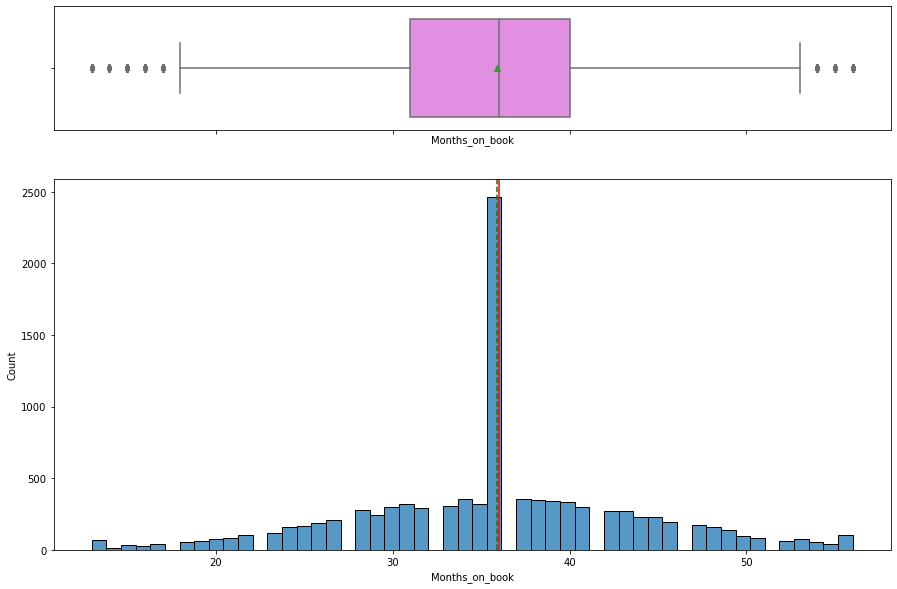

In [19]:
histogram_boxplot(df["Months_on_book"])

- Majority of customers have been using bank services for almost 3 years 

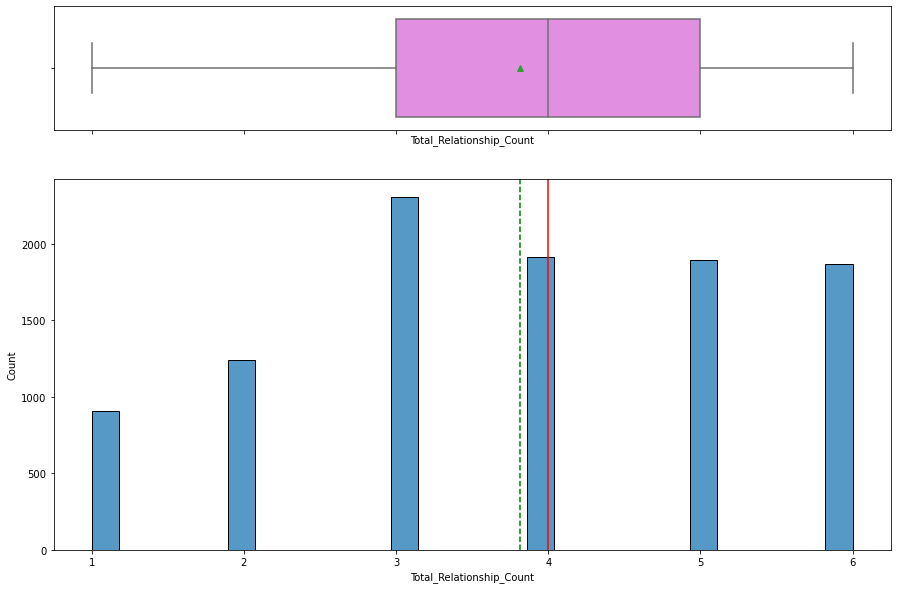

In [20]:
histogram_boxplot(df["Total_Relationship_Count"])

* Majority of customers use 3 products provided by the bank.
* The number of customers using 4, 5 and 6 are similar.

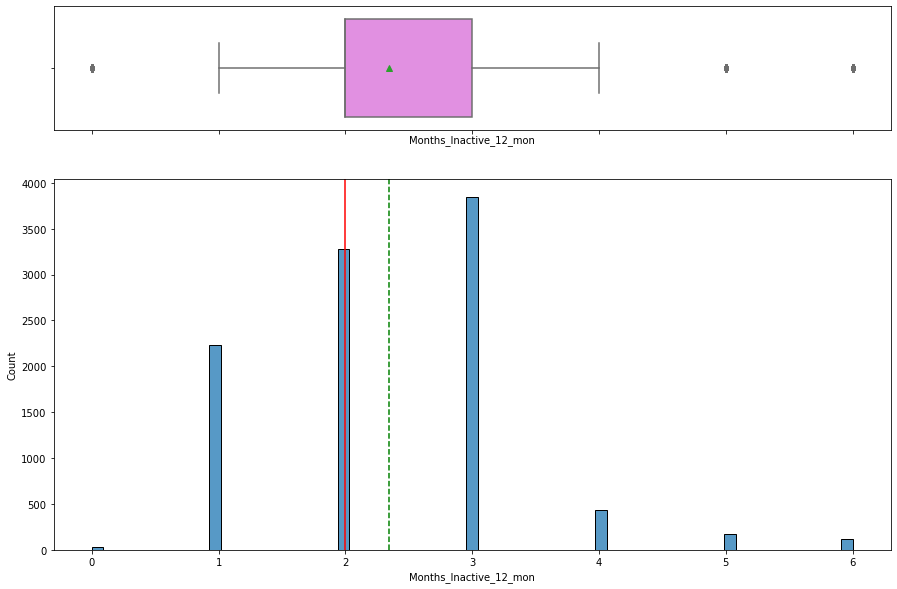

In [21]:
histogram_boxplot(df["Months_Inactive_12_mon"])

- Nearly 75% of customers have an inactive period of 3 months or lesser. There are very few customers with 0 months inactive.

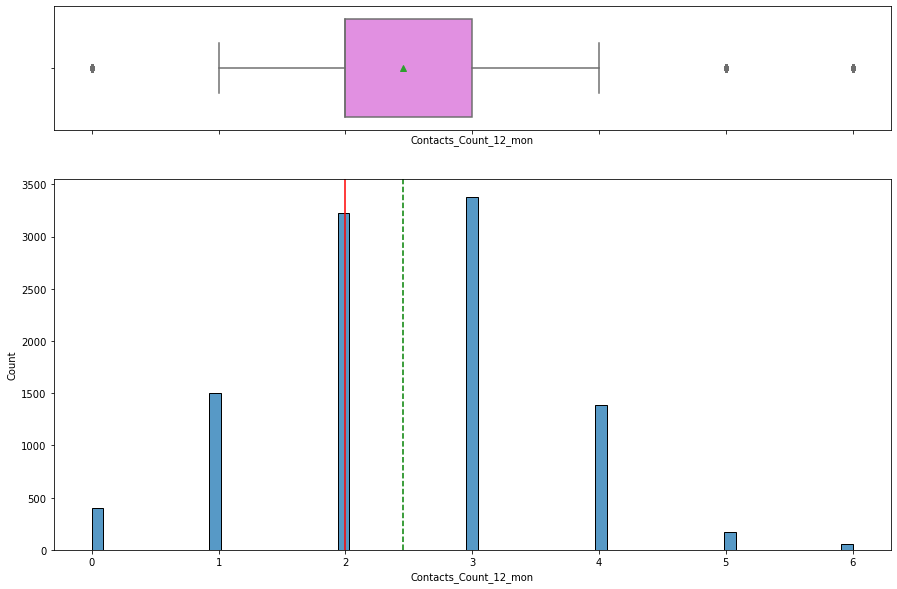

In [22]:
histogram_boxplot(df["Contacts_Count_12_mon"])

- Majority of customers made a contact with the bank 2 or 3 times in the last 12 months.

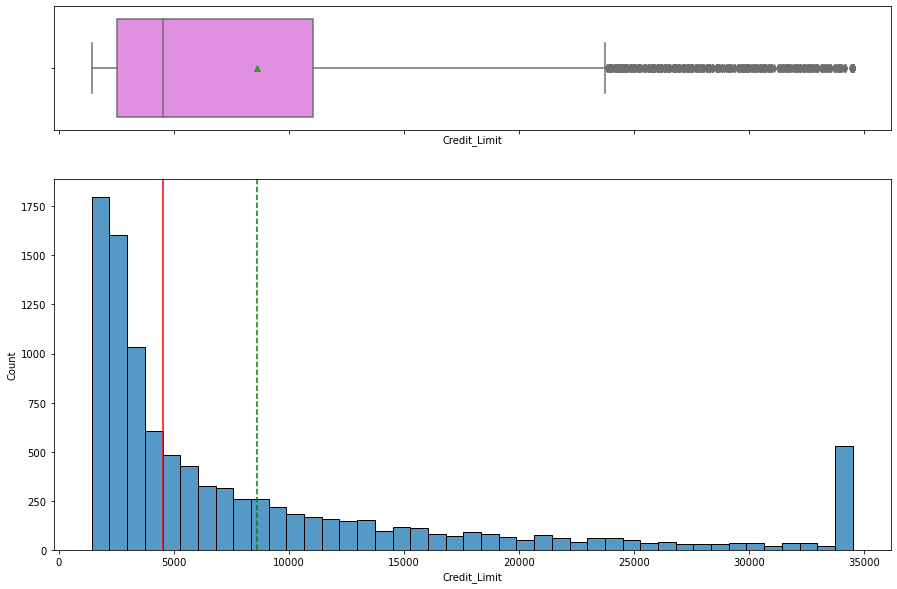

In [23]:
histogram_boxplot(df["Credit_Limit"])

- Credit limit is right skewed with majority of customers having a creditlimit of less than 10000.
- Credit limit greater than 24000 are considered outliers but as they are continuous we don't have to treat them.

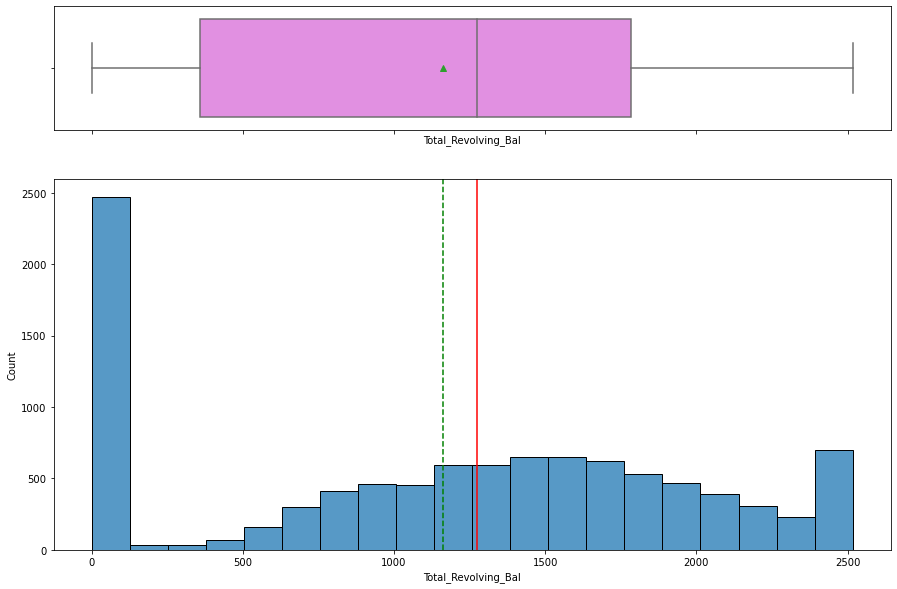

In [24]:
histogram_boxplot(df["Total_Revolving_Bal"])

- There are no outliers but there are customers with revolving balance `$0` which means the customers paying off the amount spent on credit card are higher.

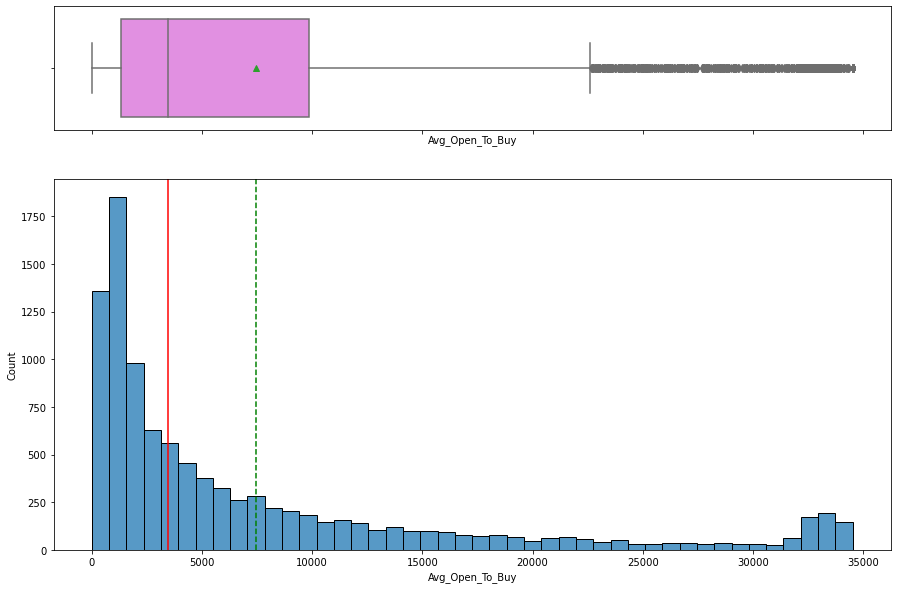

In [25]:
histogram_boxplot(df["Avg_Open_To_Buy"])

- Average open to buy is right skewed and looks similar to credit limit graph which means a customer is either not using the credit limit effectively or paying off the amount spent on credit card before the due date.

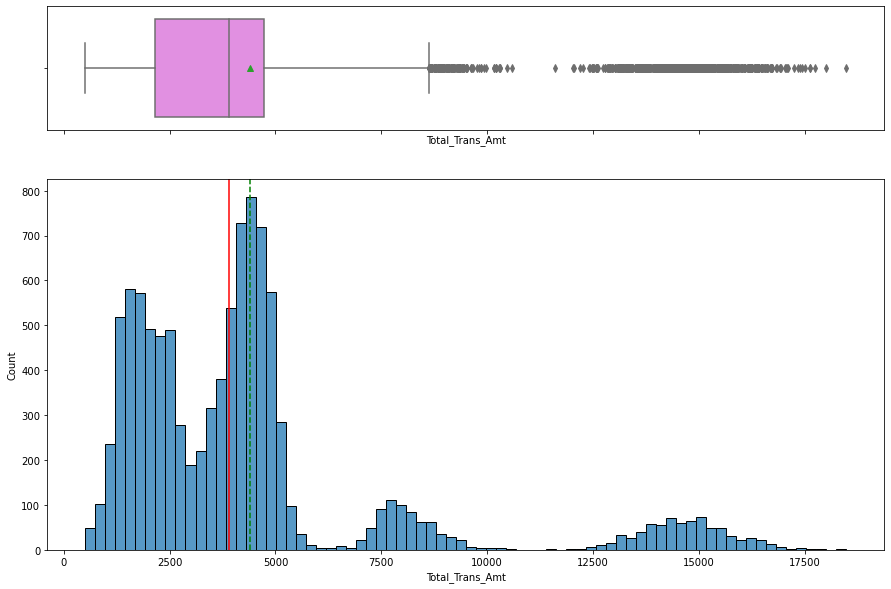

In [26]:
histogram_boxplot(df["Total_Trans_Amt"])

- Majority of customers have a total transaction amount less than 6000.

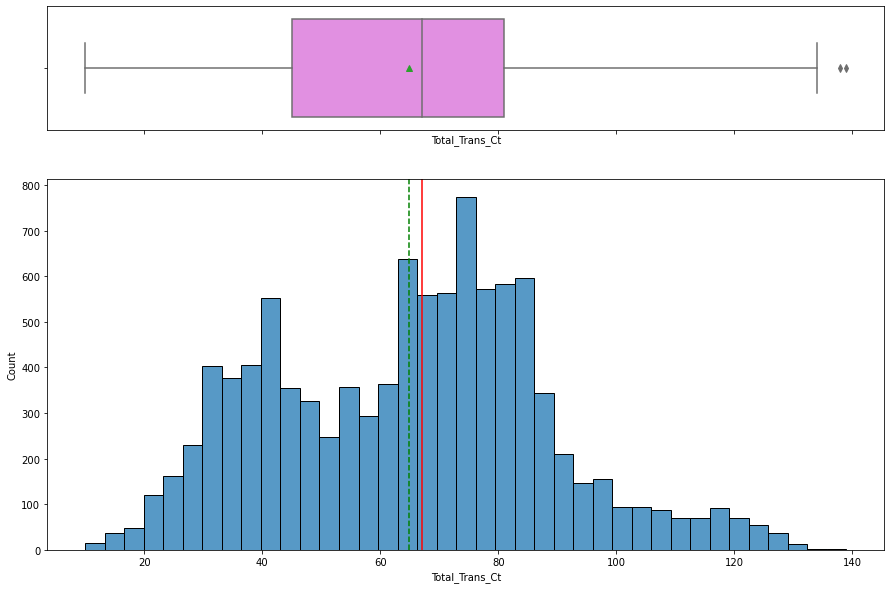

In [27]:
histogram_boxplot(df["Total_Trans_Ct"])

* Total Transaction count has a normal ditribution with a similar mean and median of around 65 and 67 respectively.

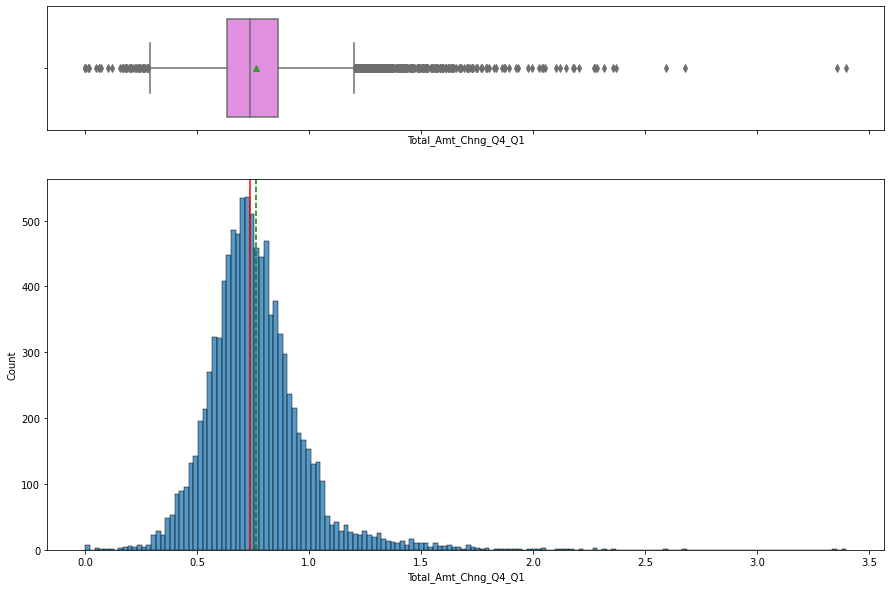

In [28]:
histogram_boxplot(df["Total_Amt_Chng_Q4_Q1"])

- Ratio of transaction amount in Q4 and Q1 follows a normal distribution with longer tail on the right.
- 75% of the customers have a ratio of less than 1 which means the amount spent on credit card in Q1 is higher than Q4 
- There are a couple of extreme values that can be capped.
- There are a minor group of customers who spent higher amount in Q4.

In [29]:
df["Total_Amt_Chng_Q4_Q1"].sort_values(ascending = False).head(20)

12      3.397
8       3.355
773     2.675
2       2.594
219     2.368
47      2.357
46      2.316
658     2.282
58      2.275
466     2.271
7       2.204
841     2.180
4       2.175
284     2.145
154     2.121
1219    2.103
177     2.053
1085    2.041
1873    2.037
431     2.023
Name: Total_Amt_Chng_Q4_Q1, dtype: float64

In [30]:
df["Total_Amt_Chng_Q4_Q1"].clip(upper = 2.675,inplace = True);

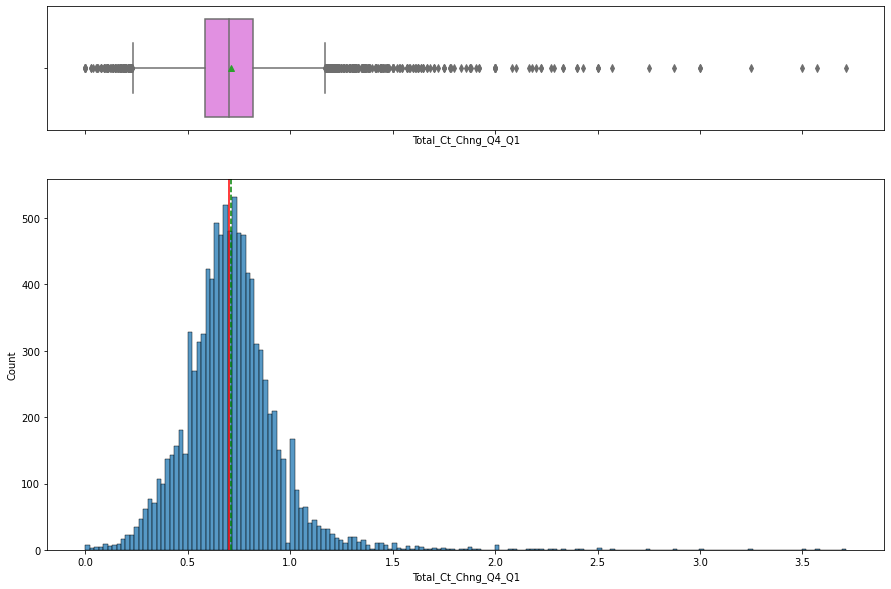

In [31]:
histogram_boxplot(df["Total_Ct_Chng_Q4_Q1"])

In [32]:
df["Total_Ct_Chng_Q4_Q1"].sort_values(ascending = False).head(20)

1       3.714
773     3.571
269     3.500
12      3.250
190     3.000
113     3.000
146     2.875
366     2.750
30      2.571
4       2.500
805     2.500
2510    2.500
158     2.429
68      2.400
280     2.400
3       2.333
2       2.333
167     2.286
239     2.273
757     2.222
Name: Total_Ct_Chng_Q4_Q1, dtype: float64

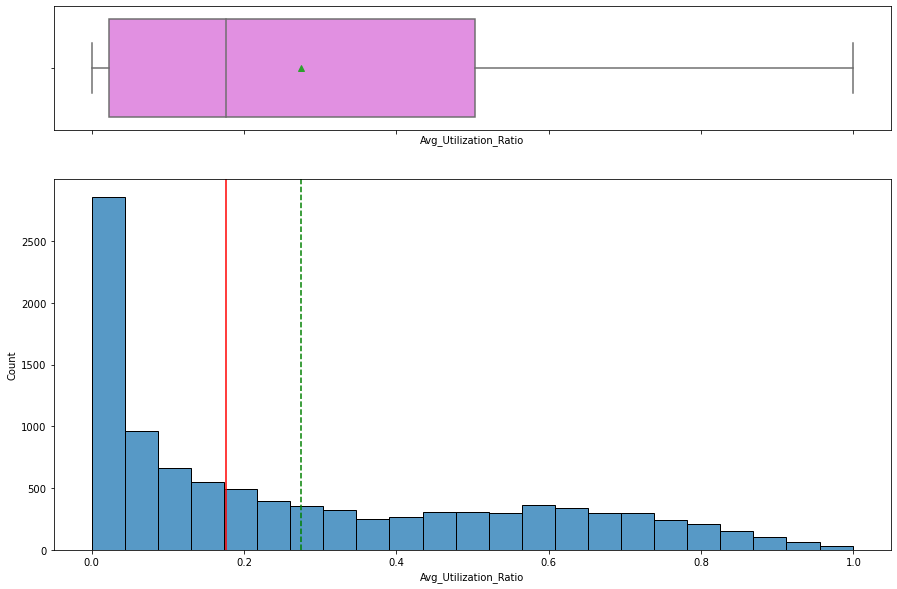

In [33]:
histogram_boxplot(df["Avg_Utilization_Ratio"])

- Average utilization ratio is extremely right skewed as close to 3000 customers have very low utilization ratio, which means close to 25% of the population are not utilizing even 3% of their available credit.

### Univariate Analysis - Categorical variables

In [34]:
def perc_on_bar(feature):
    '''
    plot
    feature: categorical feature
    the function won't work if a column is passed in hue parameter
    '''
    #Creating a countplot for the feature
    sns.set(rc={'figure.figsize':(10,5)})
    ax=sns.countplot(x=feature, data=data)
    
    total = len(feature) # length of the column
    for p in ax.patches:
        percentage = '{:.1f}%'.format(100 * p.get_height()/total) # percentage of each class of the category
        x = p.get_x() + p.get_width() / 2 - 0.1 # width of the plot
        y = p.get_y() + p.get_height()           # hieght of the plot
        ax.annotate(percentage, (x, y), size = 14) # annotate the percantage 
        
    plt.show() # show the plot

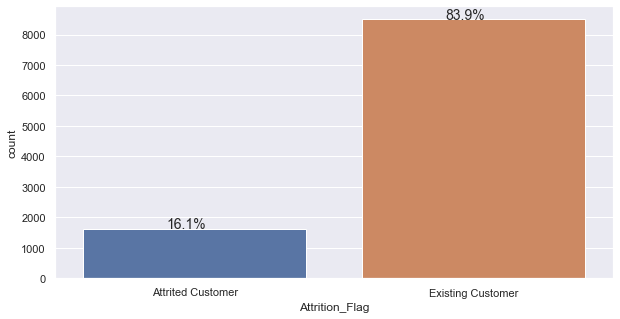

In [35]:
perc_on_bar(df["Attrition_Flag"])

- There are 84% of existing customers in the dataset which shows imbalance in the dependent variable.

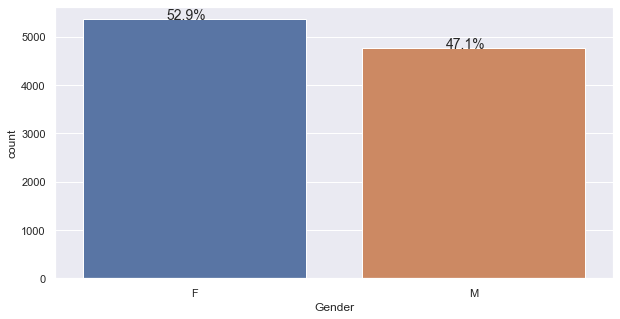

In [36]:
perc_on_bar(df["Gender"])

- There are 53% females in the given population.

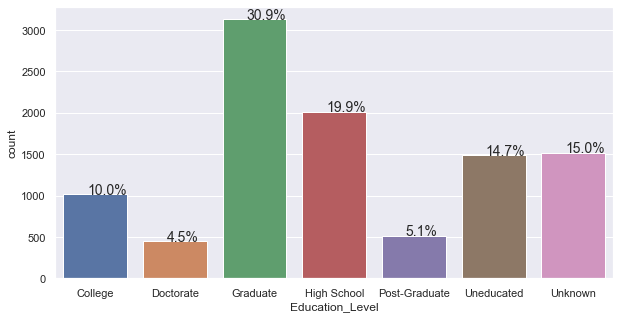

In [37]:
perc_on_bar(df["Education_Level"])

- There are 31% of customer with a graduate degree in the dataset, next highest being High School

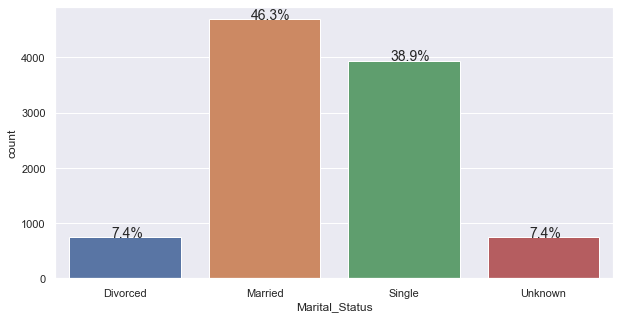

In [38]:
perc_on_bar(df["Marital_Status"])

- Majority of population are married and single customers adding up to 85% of the population

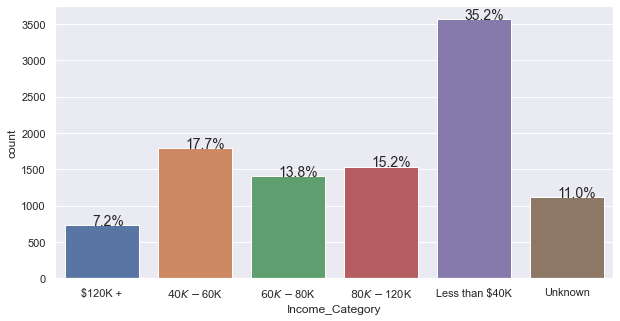

In [39]:
perc_on_bar(df["Income_Category"])

- 35% of the customers earn less than 40K per year.

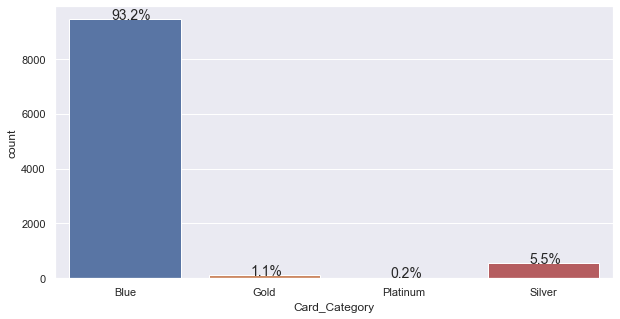

In [40]:
perc_on_bar(df["Card_Category"])

- Majority of population uses Blue card, there are only 0.2% of customers using platinum card.

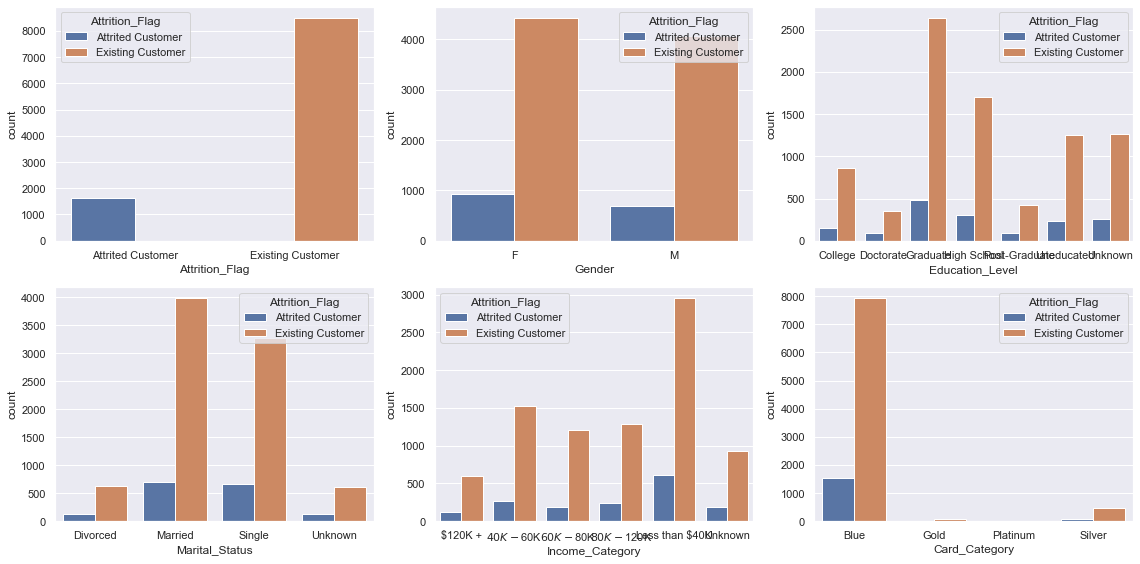

In [41]:
plt.figure(figsize = (16,8))
for i in range(len(catcols)):
    plt.subplot(2,3,i+1)
    sns.countplot(df[catcols[i]], hue = df["Attrition_Flag"])
    plt.tight_layout()

## Bivariate analysis

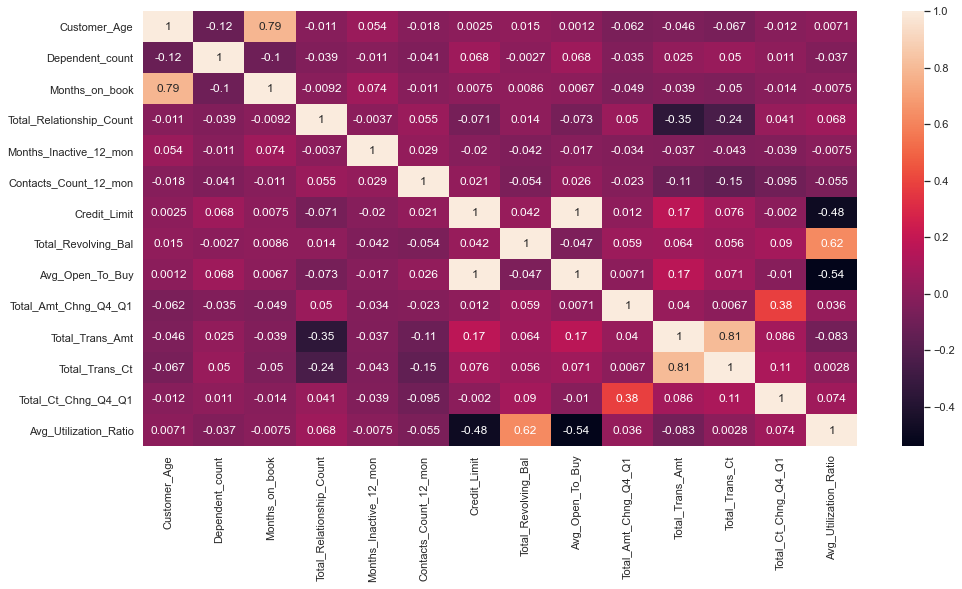

In [42]:
plt.figure(figsize = (16,8))
sns.heatmap(df.corr(),annot = True);
plt.savefig("heatmap.png")

* There is a strong correlation between customer age and months on book, which means as the customer age increases months on the book also increases that also supports less number of attrited customers in the dataset.
* Total Transaction Amount and Total Transaction count will have a stronger correlation as amount is calculated with amount of each product and the total transaction count.
* Average open to buy and credit limit are highly correlated which is expected as the higher credit limit, the average amount left on credit card will be higher.
* Average open to buy and average utilization have a negative correlation which means as the average utilization ratio is higher, the lesser credit amount is left on the credit card
* Total revolving balance has a strong relationship average utilization which is expected as the total revoving balance will be higher only if the utilization of credit card is higher.
* We might have to eliminate average utilization ratio as it is correlated with credit limit, total revolving balance and average open to buy during model building

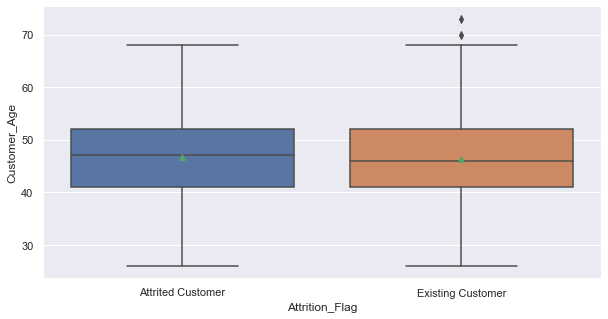

In [43]:
sns.boxplot(x = "Attrition_Flag", y = "Customer_Age",data = df, showmeans = True);

- age of the customer doesnot seems to be having any impact on whether the customer is going to churn or not

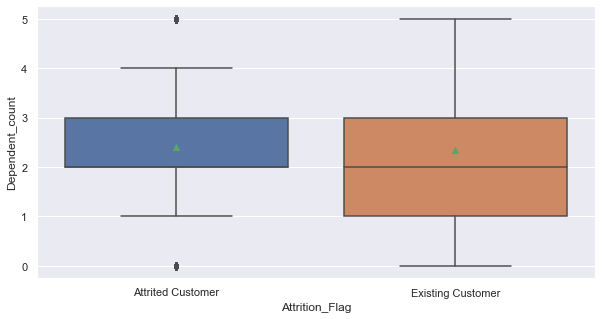

In [44]:
sns.boxplot(x = "Attrition_Flag", y = "Dependent_count", data = df,showmeans = True);

- There is no clear indication about the impact of a customer attrition with the number of dependent

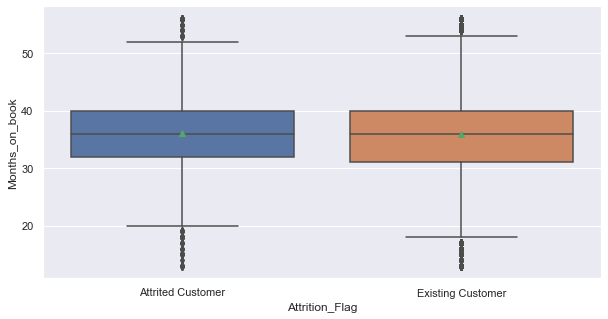

In [45]:
sns.boxplot(x = "Attrition_Flag", y = "Months_on_book", data = df,showmeans = True);

- There are outliers but doesn't seem to have an impact on attrition of the customer

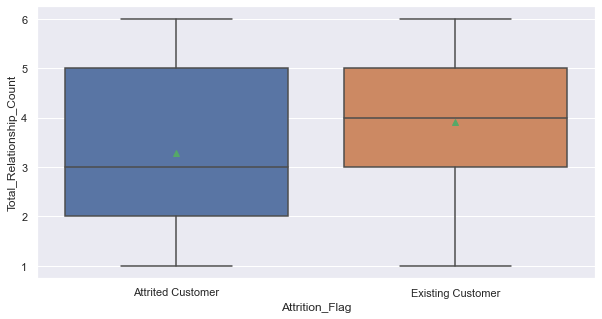

In [46]:
sns.boxplot(x = "Attrition_Flag", y = "Total_Relationship_Count",data = df,showmeans = True);

- The number of attrited customers hold 3-5 products
- Customers with less number of products with the bank have attrited.

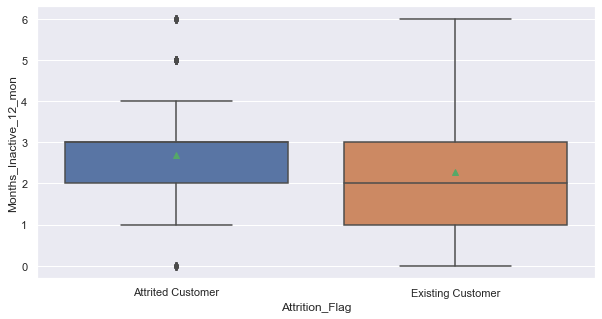

In [47]:
sns.boxplot(x = "Attrition_Flag", y = "Months_Inactive_12_mon", data = df,showmeans = True);

- Inactive months are higher for attrited customers

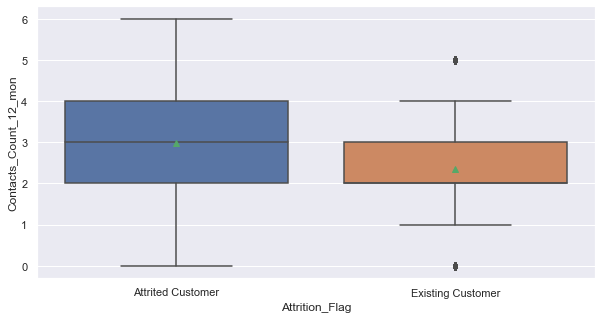

In [48]:
sns.boxplot(x = "Attrition_Flag", y = "Contacts_Count_12_mon", data = df,showmeans = True);
plt.savefig("Contacts.png")

- The number of times a customer contacted the bank in the last 12 months is higher for attrited customer

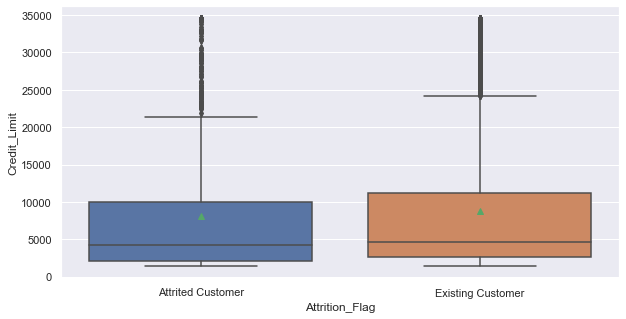

In [49]:
sns.boxplot(x = "Attrition_Flag", y = "Credit_Limit", data = df, showmeans = True);

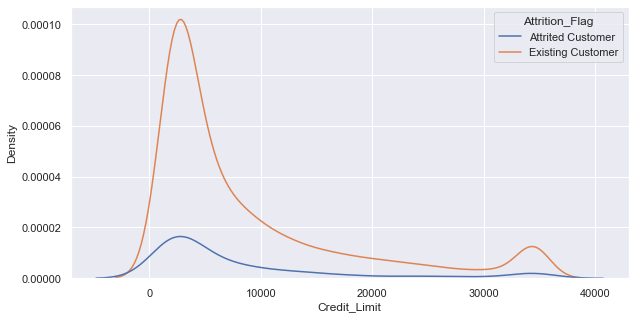

In [50]:
sns.kdeplot(data = df,x = "Credit_Limit", hue = "Attrition_Flag");

- The attrited customers have higher number of customers less than 5000, the smaller peak also can be due to imbalance in attrition flag data

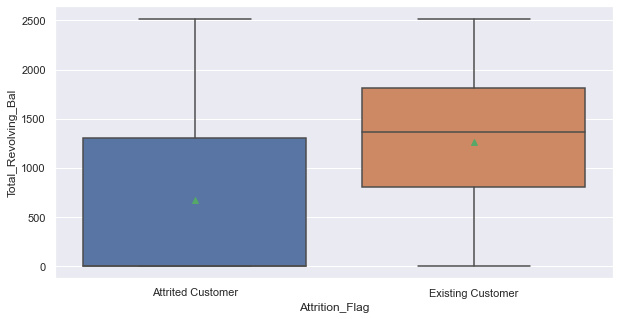

In [51]:
sns.boxplot(x = "Attrition_Flag", y = "Total_Revolving_Bal", data = df,showmeans = True);

- Total Revolving balance is very low for attrited customer indicating less usage.

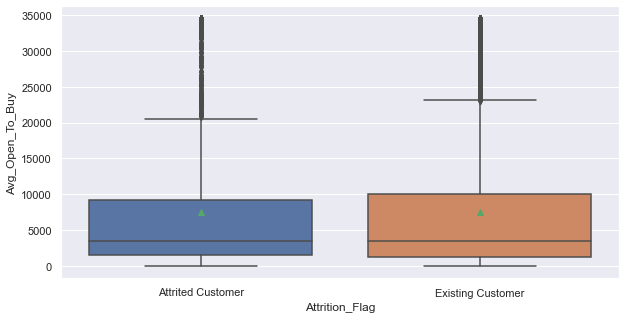

In [52]:
sns.boxplot(x = "Attrition_Flag", y = "Avg_Open_To_Buy", data = df,showmeans = True);
plt.savefig("Avg_Open.png")

- Average open to buy amount doesn't any impact on attrition

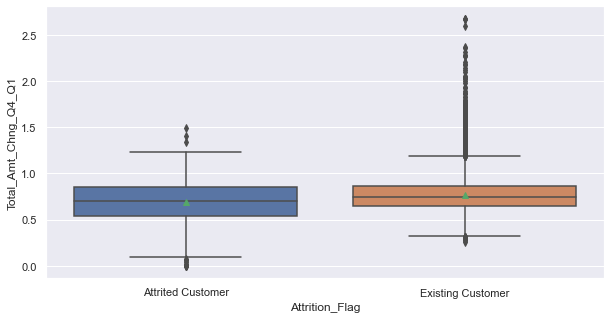

In [53]:
sns.boxplot(x = "Attrition_Flag", y = "Total_Amt_Chng_Q4_Q1", data = df,showmeans = True);

- The amount spent by attrited customer is less in Q4 than in Q1

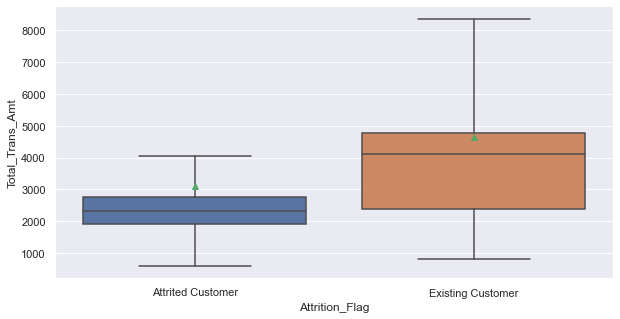

In [54]:
sns.boxplot(x = "Attrition_Flag", y = "Total_Trans_Amt", data = df, showfliers = False,showmeans = True);
plt.savefig("TransactionAmount.png")

- Total transaction amount is higher for existing customers
- The average transaction amount of attrited customers is 3000.
- This can be a significant feature in predicting attrition.

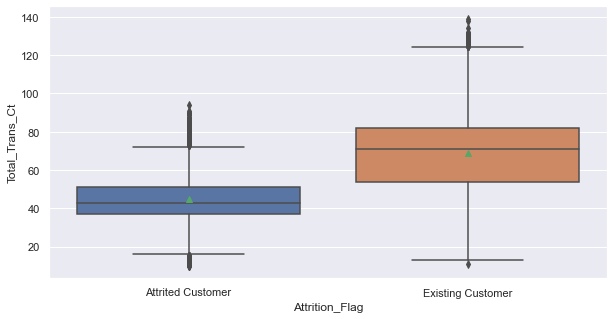

In [55]:
sns.boxplot(x = "Attrition_Flag", y = "Total_Trans_Ct", data = df,showmeans = True);

- Transaction amount and Transaction count are correlated which has a similar graph.

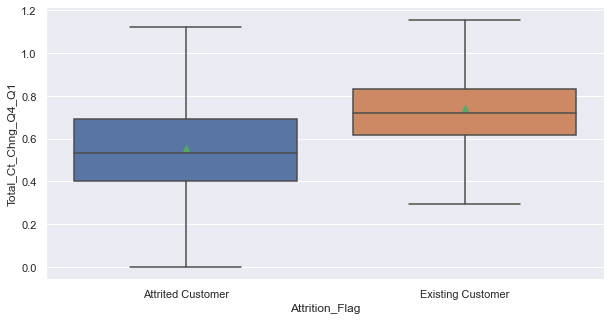

In [56]:
sns.boxplot(x = "Attrition_Flag", y = "Total_Ct_Chng_Q4_Q1", data = df, showfliers = False,showmeans = True);

- The number of transaction in Q4 is lower than that in Q1 for attrited customer

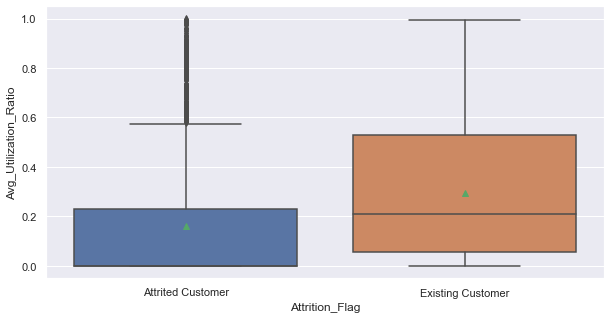

In [57]:
sns.boxplot(x = "Attrition_Flag", y = "Avg_Utilization_Ratio", data = df,showmeans = True);
plt.savefig("AvgUtilization.png")

In [58]:
### Function to plot stacked bar charts for categorical columns
def stacked_plot(x):
    sns.set(palette='nipy_spectral')
    tab1 = pd.crosstab(x,df['Attrition_Flag'],margins=True)
    print(tab1)
    print('-'*120)
    tab = pd.crosstab(x,df['Attrition_Flag'],normalize='index')
    tab.plot(kind='bar',stacked=True,figsize=(10,5))
    plt.legend(loc='lower left', frameon=False)
    plt.legend(loc="upper left", bbox_to_anchor=(1,1))
    plt.show()

Attrition_Flag  Attrited Customer  Existing Customer    All
Gender                                                     
F                             930               4428   5358
M                             697               4072   4769
All                          1627               8500  10127
------------------------------------------------------------------------------------------------------------------------


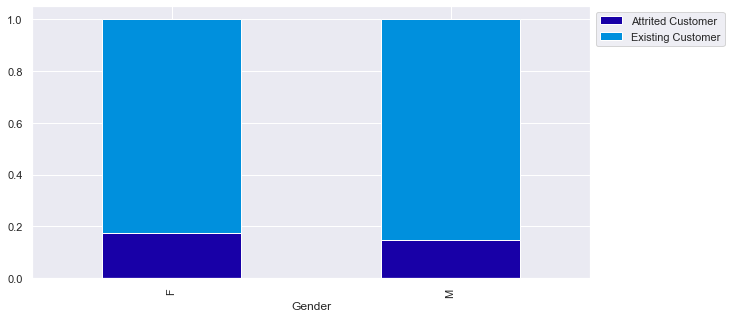

In [59]:
stacked_plot(df["Gender"])

- The conversion of existing customers to attrited customers is higher in Females

Attrition_Flag   Attrited Customer  Existing Customer    All
Education_Level                                             
College                        154                859   1013
Doctorate                       95                356    451
Graduate                       487               2641   3128
High School                    306               1707   2013
Post-Graduate                   92                424    516
Uneducated                     237               1250   1487
Unknown                        256               1263   1519
All                           1627               8500  10127
------------------------------------------------------------------------------------------------------------------------


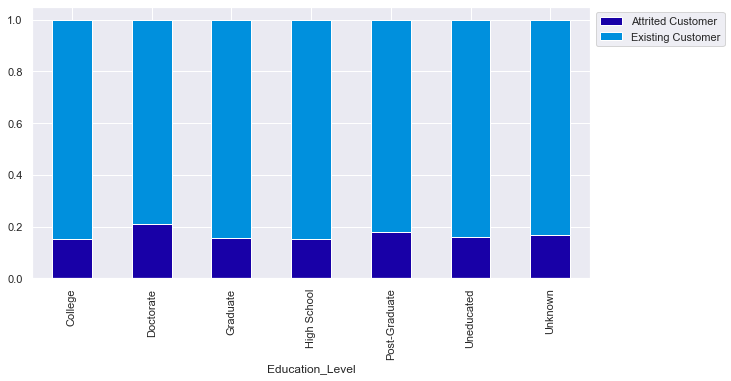

In [60]:
stacked_plot(df["Education_Level"])

* The number of customers attrited have an education level of graduate (might be because of higher number of graduates in population).
* The attrition rate increased in post graduate and doctorate which are highest education levels, that might not indicate that as the education levels increase the chance of customer attriting increases.

Attrition_Flag  Attrited Customer  Existing Customer    All
Marital_Status                                             
Divorced                      121                627    748
Married                       709               3978   4687
Single                        668               3275   3943
Unknown                       129                620    749
All                          1627               8500  10127
------------------------------------------------------------------------------------------------------------------------


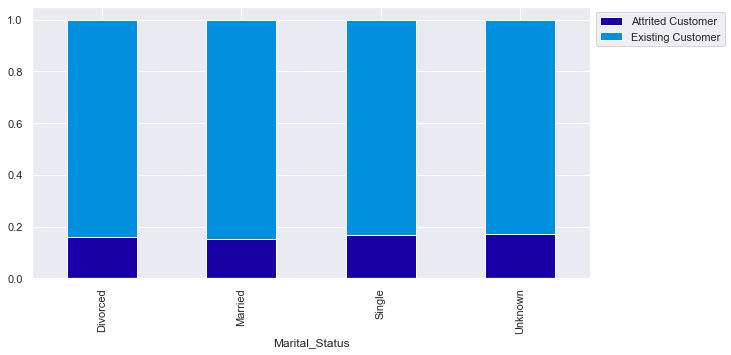

In [61]:
stacked_plot(df["Marital_Status"])

- The highest number of attrited customers are maried which might be due to the highest number of married people in the sample
- The attrition ratio is lowest for married while it is highest for single customers.
- The married customers attrition lower might be due to number of dependents and income category as well.

Attrition_Flag  Attrited Customer  Existing Customer    All
Card_Category                                              
Blue                         1519               7917   9436
Gold                           21                 95    116
Platinum                        5                 15     20
Silver                         82                473    555
All                          1627               8500  10127
------------------------------------------------------------------------------------------------------------------------


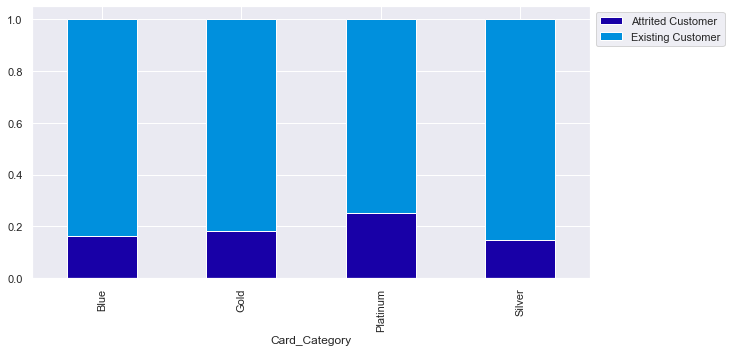

In [62]:
stacked_plot(df["Card_Category"])

- The highest number of attrited customers are customers using blue credit card might be due to 93% of the data using blue credit card.
- The attrition ratio is higher for platinum credit card category.

Attrition_Flag   Attrited Customer  Existing Customer    All
Income_Category                                             
$120K +                        126                601    727
$40K - $60K                    271               1519   1790
$60K - $80K                    189               1213   1402
$80K - $120K                   242               1293   1535
Less than $40K                 612               2949   3561
Unknown                        187                925   1112
All                           1627               8500  10127
------------------------------------------------------------------------------------------------------------------------


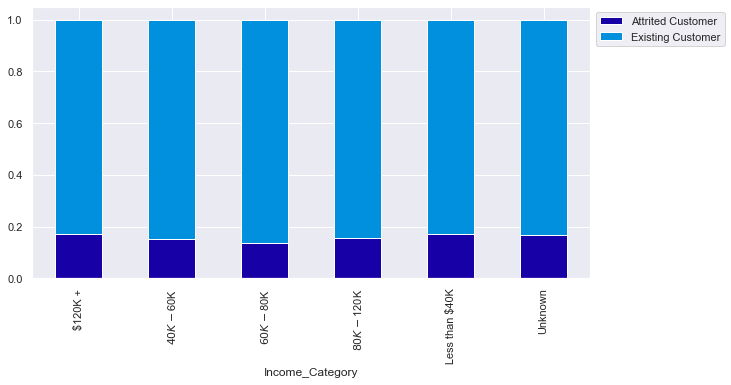

In [63]:
stacked_plot(df["Income_Category"])

- The number of attrited customers are higher for customers less than 40K.
- The proportion is higher for 120K+ while the lowest if for 60K-80K

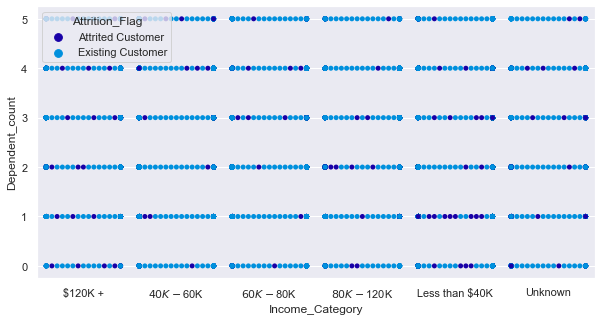

In [64]:
sns.swarmplot(x = "Income_Category", y = "Dependent_count",hue = "Attrition_Flag", data = df);

- The customers with income less than 40K and having higher number of dependents have a very less amount of customers leaving credit card services.

## Data Preperation

* **Step 1:** Attrition Flag conversion - Relabelling Attrited Customer as 1 and Existing Customer as 0
* **Step 2:** Replacing Unknown values in Education level, Marital Status and Income Category as missing values
* **Step 3:** Assign numerical values to the categorical variables to prepare data for KNNImputation
* **Step 4:** Split data into Training set and Testing set
* **Step 5:** Impute missing values using KNNImputer(number of neigbors as 5)
* **Step 6:** Replacing numerical values with actual values in categorical variables.

In [65]:
df['Attrition_Flag'] = df['Attrition_Flag'].apply(lambda x: 1 if x=='Attrited Customer' else 0)

In [66]:
df["Education_Level"].replace('Unknown',np.nan,inplace = True)
df["Marital_Status"].replace('Unknown',np.nan,inplace = True)
df["Income_Category"].replace('Unknown',np.nan,inplace = True)

In [67]:
education = {'Uneducated': 1,'High School': 2,'College': 3,'Graduate':4,'Post-Graduate': 5,'Doctorate':6}
marital = {'Married': 1, 'Single':2,'Divorced': 3}
income = {'Less than $40K': 1,'$40K - $60K': 2,'$60K - $80K': 3,'$80K - $120K': 4, '$120K +':5}
gender = {'M': 1, 'F': 2}
cardtype = {'Blue': 1,'Silver':2, 'Gold': 3, 'Platinum':4}

In [68]:
df['Education_Level']=df['Education_Level'].map(education)
df['Marital_Status']=df['Marital_Status'].map(marital)
df['Income_Category'] = df['Income_Category'].map(income)
df['Gender'] = df['Gender'].map(gender)
df['Card_Category'] = df['Card_Category'].map(cardtype)

In [69]:
# Separating target variable and other variables
X = df.drop(columns="Attrition_Flag")
Y = df["Attrition_Flag"]

In [70]:
# Splitting the data into train and test sets
X_train, X_test, y_train, y_test = train_test_split(
    X, Y, test_size=0.30, random_state=1, stratify=Y
)
print(X_train.shape, X_test.shape)

(7088, 19) (3039, 19)


### Missing-Value Treatment

* We will use KNN imputer to impute missing values.
* `KNNImputer`: Each sample's missing values are imputed by looking at the n_neighbors nearest neighbors found in the training set. Default value for n_neighbors=5.
* KNN imputer replaces missing values using the average of k nearest non-missing feature values.
* Nearest points are found based on euclidean distance.

In [71]:
imputer = KNNImputer(n_neighbors=5)

In [72]:
#Fit and transform the train data
X_train=pd.DataFrame(imputer.fit_transform(X_train),columns=X_train.columns)

#Transform the test data 
X_test=pd.DataFrame(imputer.transform(X_test),columns=X_test.columns)

In [73]:
#Checking that no column has missing values in train or test sets
print(X_train.isna().sum())
print('-'*30)
print(X_test.isna().sum())

Customer_Age                0
Gender                      0
Dependent_count             0
Education_Level             0
Marital_Status              0
Income_Category             0
Card_Category               0
Months_on_book              0
Total_Relationship_Count    0
Months_Inactive_12_mon      0
Contacts_Count_12_mon       0
Credit_Limit                0
Total_Revolving_Bal         0
Avg_Open_To_Buy             0
Total_Amt_Chng_Q4_Q1        0
Total_Trans_Amt             0
Total_Trans_Ct              0
Total_Ct_Chng_Q4_Q1         0
Avg_Utilization_Ratio       0
dtype: int64
------------------------------
Customer_Age                0
Gender                      0
Dependent_count             0
Education_Level             0
Marital_Status              0
Income_Category             0
Card_Category               0
Months_on_book              0
Total_Relationship_Count    0
Months_Inactive_12_mon      0
Contacts_Count_12_mon       0
Credit_Limit                0
Total_Revolving_Bal       

In [74]:
## Function to inverse the encoding
def inverse_mapping(x,y):
    inv_dict = {v: k for k, v in x.items()}
    X_train[y] = np.round(X_train[y]).map(inv_dict).astype('category')
    X_test[y] = np.round(X_test[y]).map(inv_dict).astype('category')

In [75]:
inverse_mapping(education,'Education_Level')
inverse_mapping(marital,'Marital_Status')
inverse_mapping(income,'Income_Category')
inverse_mapping(cardtype,'Card_Category')
inverse_mapping(gender,'Gender')

In [76]:
cols = X_train.select_dtypes(include=['object','category'])
for i in cols.columns:
    print(X_train[i].value_counts())
    print('*'*30)

F    3770
M    3318
Name: Gender, dtype: int64
******************************
Graduate         2451
High School      1633
College          1285
Uneducated       1036
Post-Graduate     371
Doctorate         312
Name: Education_Level, dtype: int64
******************************
Married     3498
Single      3088
Divorced     502
Name: Marital_Status, dtype: int64
******************************
Less than $40K    2636
$40K - $60K       1513
$80K - $120K      1218
$60K - $80K       1205
$120K +            516
Name: Income_Category, dtype: int64
******************************
Blue        6621
Silver       375
Gold          78
Platinum      14
Name: Card_Category, dtype: int64
******************************


In [77]:
cols = X_test.select_dtypes(include=['object','category'])
for i in cols.columns:
    print(X_train[i].value_counts())
    print('*'*30)

F    3770
M    3318
Name: Gender, dtype: int64
******************************
Graduate         2451
High School      1633
College          1285
Uneducated       1036
Post-Graduate     371
Doctorate         312
Name: Education_Level, dtype: int64
******************************
Married     3498
Single      3088
Divorced     502
Name: Marital_Status, dtype: int64
******************************
Less than $40K    2636
$40K - $60K       1513
$80K - $120K      1218
$60K - $80K       1205
$120K +            516
Name: Income_Category, dtype: int64
******************************
Blue        6621
Silver       375
Gold          78
Platinum      14
Name: Card_Category, dtype: int64
******************************


### Converting categorical variables using get dummies

In [78]:
X_train=pd.get_dummies(X_train,drop_first=True)
X_test=pd.get_dummies(X_test,drop_first=True)
print(X_train.shape, X_test.shape)

(7088, 29) (3039, 29)


## Model Building - Logistic Regression

### Model evaluation criterion:

#### Model can make wrong predictions as:
1. Predicting a customer will churn and the customer doesn't churn - Loss of resources
2. Predicting a customer will not churn and the customer churns - Loss of customer

#### Which case is more important? 
* Predicting that customer will not churn but the customer churns i.e. losing on a potential source of income for the company because that customer will not be targeted by the marketing team when he should be targeted.

#### How to reduce this loss i.e need to reduce False Negatives?
* Company wants Recall to be maximized, greater the Recall lesser the chances of false negatives.

In [79]:
##  Function to calculate different metric scores of the model - Accuracy, Recall and Precision
def get_metrics_score(model,train,test,train_y,test_y,flag=True):
    '''
    model : classifier to predict values of X

    '''
    # defining an empty list to store train and test results
    score_list=[] 
    
    pred_train = model.predict(train)
    pred_test = model.predict(test)
    
    train_acc = model.score(train,train_y)
    test_acc = model.score(test,test_y)
    
    train_recall = metrics.recall_score(train_y,pred_train)
    test_recall = metrics.recall_score(test_y,pred_test)
    
    train_precision = metrics.precision_score(train_y,pred_train)
    test_precision = metrics.precision_score(test_y,pred_test)
    
    score_list.extend((train_acc,test_acc,train_recall,test_recall,train_precision,test_precision))
        
    # If the flag is set to True then only the following print statements will be displayed. The default value is set to True.
    if flag == True: 
        print("Accuracy on training set : ",model.score(train,train_y))
        print("Accuracy on test set : ",model.score(test,test_y))
        print("Recall on training set : ",metrics.recall_score(train_y,pred_train))
        print("Recall on test set : ",metrics.recall_score(test_y,pred_test))
        print("Precision on training set : ",metrics.precision_score(train_y,pred_train))
        print("Precision on test set : ",metrics.precision_score(test_y,pred_test))
    
    return score_list # returning the list with train and test scores

In [80]:
## Function to create confusion matrix
def make_confusion_matrix(model, y_actual, labels=[1, 0]):
    """
    model: classifier to predict values of X
    y_actual: ground truth

    """
    y_predict = model.predict(X_test)
    cm = metrics.confusion_matrix(y_actual, y_predict, labels=[0, 1])
    df_cm = pd.DataFrame(
        cm,
        index=[i for i in ["Actual - No", "Actual - Yes"]],
        columns=[i for i in ["Predicted - No", "Predicted - Yes"]],
    )
    group_counts = ["{0:0.0f}".format(value) for value in cm.flatten()]
    group_percentages = ["{0:.2%}".format(value) for value in cm.flatten() / np.sum(cm)]
    labels = [f"{v1}\n{v2}" for v1, v2 in zip(group_counts, group_percentages)]
    labels = np.asarray(labels).reshape(2, 2)
    plt.figure(figsize=(10, 7))
    sns.heatmap(df_cm, annot=labels, fmt="")
    plt.ylabel("True label")
    plt.xlabel("Predicted label")

### Baseline Logistic Regression Model

In [81]:
lr = LogisticRegression(random_state=1)
model  = lr.fit(X_train,y_train)

# Let's check model performances for this model
scores_LR = get_metrics_score(model,X_train,X_test,y_train,y_test)

Accuracy on training set :  0.8783860045146726
Accuracy on test set :  0.8789075353734781
Recall on training set :  0.43371378402107114
Recall on test set :  0.430327868852459
Precision on training set :  0.6947960618846695
Precision on test set :  0.7


- There is no overfitting and model is generalising well but the recall score is low at 43% in both training and testing.
- Let's try to improve that using upsampling (SMOTE) and downsampling (RandomUnderSampler) as we are dealing with Imbalanced class.

* As we have seen in correlation heatmap matrix, there are independent features correlated, we need to eliminate them.
* Eliminating multicollinearity between independent variables to get accurate prediction using VIF(Variance Inflation Factor)
* Independent variables with a higher VIF can be eliminated

In [82]:
# changing datatype of colums to numeric for checking vif
X_train_num = X_train.astype(float).copy()

In [83]:
vif_series1 = pd.Series([variance_inflation_factor(X_train_num.values,i) for i in range(X_train_num.shape[1])],index=X_train_num.columns, dtype = float)
print('Series before feature selection: \n\n{}\n'.format(vif_series1))

Series before feature selection: 

Customer_Age                      80.555974
Dependent_count                    4.130034
Months_on_book                    55.888169
Total_Relationship_Count           7.763495
Months_Inactive_12_mon             6.201937
Contacts_Count_12_mon              5.829503
Credit_Limit                            inf
Total_Revolving_Bal                     inf
Avg_Open_To_Buy                         inf
Total_Amt_Chng_Q4_Q1              14.599161
Total_Trans_Amt                    8.786442
Total_Trans_Ct                    24.362469
Total_Ct_Chng_Q4_Q1               11.857648
Avg_Utilization_Ratio              6.085985
Gender_M                           3.820619
Education_Level_Doctorate          1.235987
Education_Level_Graduate           2.851611
Education_Level_High School        2.230323
Education_Level_Post-Graduate      1.283603
Education_Level_Uneducated         1.783158
Marital_Status_Married             7.445923
Marital_Status_Single              6.6775

- Credit limit, Total Revolving Balance and Average Open to buy have an infinite VIF value which means they have a higher correlation, we can check if we can eliminate any columns to reduce the VIF.

#### Dropping Credit Limit column

In [84]:
X_train2 = X_train.drop(['Credit_Limit'], axis = 1)
vif_series3 = pd.Series([variance_inflation_factor(X_train2.values,i) for i in range(X_train2.shape[1])],index=X_train2.columns, dtype = float)
print('Series before feature selection: \n\n{}\n'.format(vif_series3))

Series before feature selection: 

Customer_Age                      80.555974
Dependent_count                    4.130034
Months_on_book                    55.888169
Total_Relationship_Count           7.763495
Months_Inactive_12_mon             6.201937
Contacts_Count_12_mon              5.829503
Total_Revolving_Bal                6.520749
Avg_Open_To_Buy                    4.917091
Total_Amt_Chng_Q4_Q1              14.599161
Total_Trans_Amt                    8.786442
Total_Trans_Ct                    24.362469
Total_Ct_Chng_Q4_Q1               11.857648
Avg_Utilization_Ratio              6.085985
Gender_M                           3.820619
Education_Level_Doctorate          1.235987
Education_Level_Graduate           2.851611
Education_Level_High School        2.230323
Education_Level_Post-Graduate      1.283603
Education_Level_Uneducated         1.783158
Marital_Status_Married             7.445923
Marital_Status_Single              6.677539
Income_Category_$40K - $60K        4.7190

- Customer Age, Months on book have highest VIF we will eliminate one of these.
- Total Transaction Count and Ratio of total Transaction count in Q4 with total Transaction count in Q1 has a higher VIF we will eliminate these columns as well.

In [85]:
X_train3 = X_train2.drop(['Customer_Age','Total_Ct_Chng_Q4_Q1','Total_Trans_Ct'], axis = 1)
vif_series3 = pd.Series([variance_inflation_factor(X_train3.values,i) for i in range(X_train3.shape[1])],index=X_train3.columns, dtype = float)
print('Series before feature selection: \n\n{}\n'.format(vif_series3))

Series before feature selection: 

Dependent_count                    4.041511
Months_on_book                    17.068437
Total_Relationship_Count           7.488745
Months_Inactive_12_mon             6.168993
Contacts_Count_12_mon              5.783561
Total_Revolving_Bal                6.497100
Avg_Open_To_Buy                    4.807805
Total_Amt_Chng_Q4_Q1              11.922913
Total_Trans_Amt                    3.188191
Avg_Utilization_Ratio              5.991465
Gender_M                           3.800510
Education_Level_Doctorate          1.233815
Education_Level_Graduate           2.834951
Education_Level_High School        2.220310
Education_Level_Post-Graduate      1.283045
Education_Level_Uneducated         1.775553
Marital_Status_Married             7.228414
Marital_Status_Single              6.452218
Income_Category_$40K - $60K        4.495899
Income_Category_$60K - $80K        3.147425
Income_Category_$80K - $120K       3.042967
Income_Category_Less than $40K     8.4720

* Months on book has a higher VIF, we will drop that column.

In [86]:
X_train4 = X_train3.drop(['Months_on_book'], axis = 1)
vif_series4 = pd.Series([variance_inflation_factor(X_train4.values,i) for i in range(X_train4.shape[1])],index=X_train4.columns, dtype = float)
print('Series before feature selection: \n\n{}\n'.format(vif_series4))

Series before feature selection: 

Dependent_count                    4.040035
Total_Relationship_Count           7.371801
Months_Inactive_12_mon             5.939125
Contacts_Count_12_mon              5.722181
Total_Revolving_Bal                6.486911
Avg_Open_To_Buy                    4.674329
Total_Amt_Chng_Q4_Q1              11.761551
Total_Trans_Amt                    3.179573
Avg_Utilization_Ratio              5.984253
Gender_M                           3.744216
Education_Level_Doctorate          1.227306
Education_Level_Graduate           2.813309
Education_Level_High School        2.208274
Education_Level_Post-Graduate      1.281732
Education_Level_Uneducated         1.768291
Marital_Status_Married             6.881710
Marital_Status_Single              6.176555
Income_Category_$40K - $60K        4.187192
Income_Category_$60K - $80K        3.004900
Income_Category_$80K - $120K       2.951532
Income_Category_Less than $40K     7.790351
Card_Category_Gold                 1.1182

- Total Amount Change Q4 to Q1 has a higher VIF, that can be dropped

In [87]:
X_train5 = X_train4.drop(['Total_Amt_Chng_Q4_Q1'], axis = 1)
vif_series5 = pd.Series([variance_inflation_factor(X_train5.values,i) for i in range(X_train5.shape[1])],index=X_train5.columns, dtype = float)
print('Series before feature selection: \n\n{}\n'.format(vif_series5))

Series before feature selection: 

Dependent_count                   4.031490
Total_Relationship_Count          7.071831
Months_Inactive_12_mon            5.914700
Contacts_Count_12_mon             5.691610
Total_Revolving_Bal               6.472142
Avg_Open_To_Buy                   4.594229
Total_Trans_Amt                   3.112984
Avg_Utilization_Ratio             5.969841
Gender_M                          3.693290
Education_Level_Doctorate         1.225543
Education_Level_Graduate          2.799926
Education_Level_High School       2.195669
Education_Level_Post-Graduate     1.279435
Education_Level_Uneducated        1.762506
Marital_Status_Married            6.685100
Marital_Status_Single             6.064526
Income_Category_$40K - $60K       3.924041
Income_Category_$60K - $80K       2.861163
Income_Category_$80K - $120K      2.861260
Income_Category_Less than $40K    7.271991
Card_Category_Gold                1.117210
Card_Category_Platinum            1.029148
Card_Category_Silve

In [88]:
X_train6 = X_train5.drop(['Total_Relationship_Count'], axis = 1)
vif_series6 = pd.Series([variance_inflation_factor(X_train6.values,i) for i in range(X_train6.shape[1])],index=X_train6.columns, dtype = float)
print('Series before feature selection: \n\n{}\n'.format(vif_series6))

Series before feature selection: 

Dependent_count                   4.014070
Months_Inactive_12_mon            5.879900
Contacts_Count_12_mon             5.603468
Total_Revolving_Bal               6.464115
Avg_Open_To_Buy                   4.495005
Total_Trans_Amt                   2.877231
Avg_Utilization_Ratio             5.937176
Gender_M                          3.629985
Education_Level_Doctorate         1.222102
Education_Level_Graduate          2.776874
Education_Level_High School       2.179533
Education_Level_Post-Graduate     1.274066
Education_Level_Uneducated        1.750814
Marital_Status_Married            6.519241
Marital_Status_Single             5.919094
Income_Category_$40K - $60K       3.690566
Income_Category_$60K - $80K       2.736358
Income_Category_$80K - $120K      2.770002
Income_Category_Less than $40K    6.732879
Card_Category_Gold                1.113518
Card_Category_Platinum            1.028179
Card_Category_Silver              1.418780
dtype: float64



In [89]:
X_train7 = X_train6.drop(['Total_Revolving_Bal'], axis = 1)
vif_series7 = pd.Series([variance_inflation_factor(X_train7.values,i) for i in range(X_train7.shape[1])],index=X_train7.columns, dtype = float)
print('Series before feature selection: \n\n{}\n'.format(vif_series7))

Series before feature selection: 

Dependent_count                   4.011632
Months_Inactive_12_mon            5.877204
Contacts_Count_12_mon             5.603462
Avg_Open_To_Buy                   4.081938
Total_Trans_Amt                   2.836945
Avg_Utilization_Ratio             2.716138
Gender_M                          3.619111
Education_Level_Doctorate         1.221839
Education_Level_Graduate          2.775906
Education_Level_High School       2.178422
Education_Level_Post-Graduate     1.273816
Education_Level_Uneducated        1.750603
Marital_Status_Married            6.512483
Marital_Status_Single             5.917274
Income_Category_$40K - $60K       3.689075
Income_Category_$60K - $80K       2.728936
Income_Category_$80K - $120K      2.762614
Income_Category_Less than $40K    6.726525
Card_Category_Gold                1.112997
Card_Category_Platinum            1.027915
Card_Category_Silver              1.418722
dtype: float64



In [90]:
X_train.drop(['Total_Revolving_Bal','Total_Relationship_Count','Total_Amt_Chng_Q4_Q1','Months_on_book',
              'Customer_Age','Total_Ct_Chng_Q4_Q1','Total_Trans_Ct','Credit_Limit'],axis = 1,inplace = True)
X_test.drop(['Total_Revolving_Bal','Total_Relationship_Count','Total_Amt_Chng_Q4_Q1','Months_on_book',
              'Customer_Age','Total_Ct_Chng_Q4_Q1','Total_Trans_Ct','Credit_Limit'],axis = 1,inplace = True)

In [91]:
lr = LogisticRegression(random_state=1)
model  = lr.fit(X_train,y_train)

# Let's check model performances for this model
scores_LR = get_metrics_score(model,X_train,X_test,y_train,y_test)

Accuracy on training set :  0.8491817155756207
Accuracy on test set :  0.851595919710431
Recall on training set :  0.12467076382791922
Recall on test set :  0.12295081967213115
Precision on training set :  0.6635514018691588
Precision on test set :  0.7228915662650602


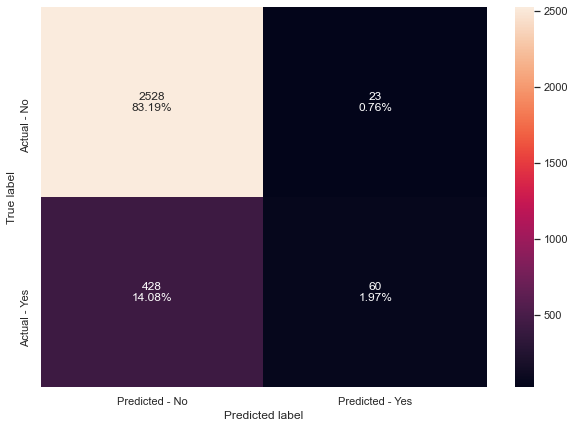

In [92]:
make_confusion_matrix(lr,y_test)

In [93]:
print("Before UpSampling, counts of label 'Yes': {}".format(sum(y_train==1)))
print("Before UpSampling, counts of label 'No': {} \n".format(sum(y_train==0)))

sm = SMOTE(sampling_strategy = 1 ,k_neighbors = 5, random_state=1)   #Synthetic Minority Over Sampling Technique
X_train_over, y_train_over = sm.fit_resample(X_train, y_train)


print("After UpSampling, counts of label 'Yes': {}".format(sum(y_train_over==1)))
print("After UpSampling, counts of label 'No': {} \n".format(sum(y_train_over==0)))


print('After UpSampling, the shape of train_X: {}'.format(X_train_over.shape))
print('After UpSampling, the shape of train_y: {} \n'.format(y_train_over.shape))

Before UpSampling, counts of label 'Yes': 1139
Before UpSampling, counts of label 'No': 5949 

After UpSampling, counts of label 'Yes': 5949
After UpSampling, counts of label 'No': 5949 

After UpSampling, the shape of train_X: (11898, 21)
After UpSampling, the shape of train_y: (11898,) 



In [94]:
lr2 = LogisticRegression(random_state=1)
lr2.fit(X_train_over,y_train_over)

LogisticRegression(random_state=1)

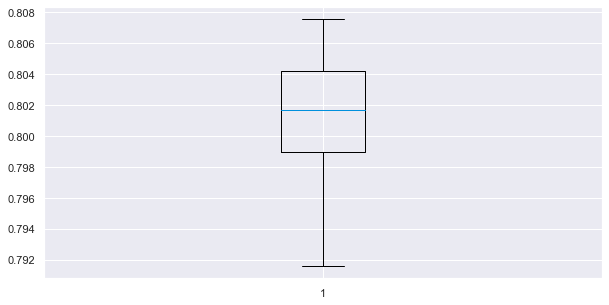

In [95]:
scoring='recall'
kfold=StratifiedKFold(n_splits=5,shuffle=True,random_state=1)     #Setting number of splits equal to 5
cv_result_over=cross_val_score(estimator=lr2, X=X_train_over, y=y_train_over, scoring=scoring, cv=kfold)
#Plotting boxplots for CV scores of model defined above
plt.boxplot(cv_result_over)
plt.show()

Accuracy on training set :  0.8200537905530342
Accuracy on test set :  0.7660414610069102
Recall on training set :  0.8021516221213649
Recall on test set :  0.39139344262295084
Precision on training set :  0.8319386331938633
Precision on test set :  0.315702479338843


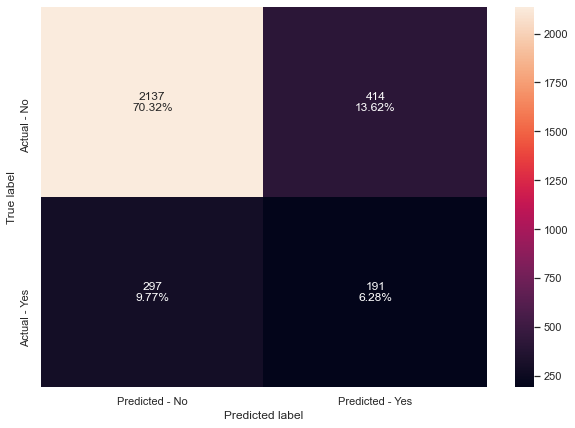

In [96]:
#Calculating different metrics
get_metrics_score(lr2,X_train_over,X_test,y_train_over,y_test)

# creating confusion matrix
make_confusion_matrix(lr2,y_test)

In [97]:
# Choose the type of classifier. 
lr_estimator = LogisticRegression(random_state=1,solver='liblinear')

# Grid of parameters to choose from
parameters = {'C': np.arange(0.1,1.1,0.1)}

# Run the grid search
grid_obj = GridSearchCV(lr_estimator, parameters, scoring='recall',n_jobs = -1)
grid_obj = grid_obj.fit(X_train_over, y_train_over)

# Set the clf to the best combination of parameters
lr_estimator = grid_obj.best_estimator_

# Fit the best algorithm to the data. 
lr_estimator.fit(X_train_over, y_train_over)

LogisticRegression(random_state=1, solver='liblinear')

Accuracy on training set :  0.8449319213313162
Accuracy on test set :  0.7963145771635406
Recall on training set :  0.819633551857455
Recall on test set :  0.36270491803278687
Precision on training set :  0.863314447592068
Precision on test set :  0.3649484536082474


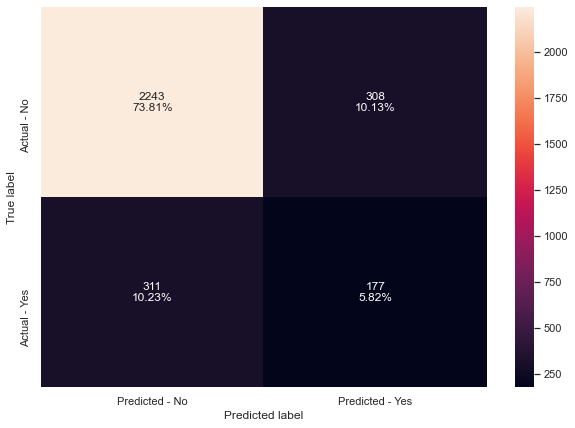

In [98]:
#Calculating different metrics
get_metrics_score(lr_estimator,X_train_over,X_test,y_train_over,y_test)

# creating confusion matrix
make_confusion_matrix(lr_estimator,y_test)

In [99]:
rus = RandomUnderSampler(random_state = 1)
X_train_un, y_train_un = rus.fit_resample(X_train, y_train)

In [100]:
log_reg_under = LogisticRegression(random_state = 1)
log_reg_under.fit(X_train_un,y_train_un)

LogisticRegression(random_state=1)

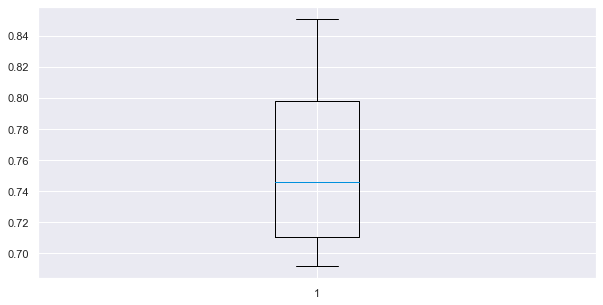

In [101]:
scoring='recall'
kfold=StratifiedKFold(n_splits=5,shuffle=True,random_state=1)     #Setting number of splits equal to 5
cv_result_under=cross_val_score(estimator=log_reg_under, X=X_train_un, y=y_train_un, scoring=scoring, cv=kfold)
#Plotting boxplots for CV scores of model defined above
plt.boxplot(cv_result_under)
plt.show()

Accuracy on training set :  0.7010535557506584
Accuracy on test set :  0.6640342217834814
Recall on training set :  0.7190517998244074
Recall on test set :  0.680327868852459
Precision on training set :  0.6940677966101695
Precision on test set :  0.27736006683375103


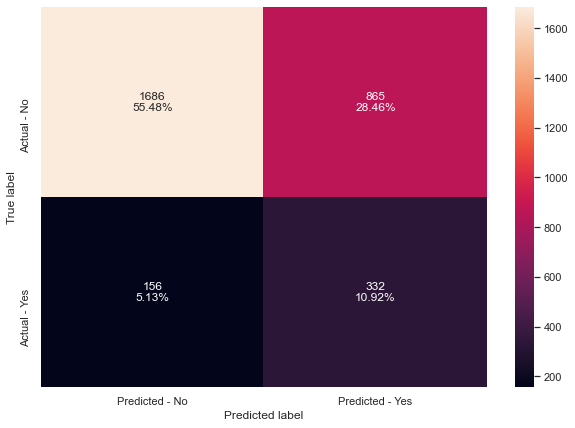

In [102]:
#Calculating different metrics
get_metrics_score(log_reg_under,X_train_un,X_test,y_train_un,y_test)


# creating confusion matrix
make_confusion_matrix(log_reg_under,y_test)

In [103]:
# defining list of model
models = [lr]

# defining empty lists to add train and test results
acc_train = []
acc_test = []
recall_train = []
recall_test = []
precision_train = []
precision_test = []

# looping through all the models to get the metrics score - Accuracy, Recall and Precision
for model in models:
    
    j = get_metrics_score(model,X_train,X_test,y_train,y_test,False)
    acc_train.append(j[0])
    acc_test.append(j[1])
    recall_train.append(j[2])
    recall_test.append(j[3])
    precision_train.append(j[4])
    precision_test.append(j[5])

In [104]:
# defining list of models
models = [lr2, lr_estimator]

# looping through all the models to get the metrics score - Accuracy, Recall and Precision
for model in models:
    
    j = get_metrics_score(model,X_train_over,X_test,y_train_over,y_test,False)
    acc_train.append(j[0])
    acc_test.append(j[1])
    recall_train.append(j[2])
    recall_test.append(j[3])
    precision_train.append(j[4])
    precision_test.append(j[5])

In [105]:
# defining list of model
models = [log_reg_under]

# looping through all the models to get the metrics score - Accuracy, Recall and Precision
for model in models:
    
    j = get_metrics_score(model,X_train_un,X_test,y_train_un,y_test,False)
    acc_train.append(j[0])
    acc_test.append(j[1])
    recall_train.append(j[2])
    recall_test.append(j[3])
    precision_train.append(j[4])
    precision_test.append(j[5])

In [106]:
comparison_frame = pd.DataFrame({'Model':['Logistic Regression','Logistic Regression on Oversampled data',
                                          'Logistic Regression-Regularized (Oversampled data)','Logistic Regression on Undersampled data'], 
                                          'Train_Accuracy': acc_train,'Test_Accuracy': acc_test,
                                          'Train_Recall':recall_train,'Test_Recall':recall_test,
                                          'Train_Precision':precision_train,'Test_Precision':precision_test}) 

#Sorting models in decreasing order of test recall
comparison_frame

,Model,Train_Accuracy,Test_Accuracy,Train_Recall,Test_Recall,Train_Precision,Test_Precision
0,Logistic Regression,0.849182,0.851596,0.124671,0.122951,0.663551,0.722892
1,Logistic Regression on Oversampled data,0.820054,0.766041,0.802152,0.391393,0.831939,0.315702
2,Logistic Regression-Regularized (Oversampled d...,0.844932,0.796315,0.819634,0.362705,0.863314,0.364948
3,Logistic Regression on Undersampled data,0.701054,0.664034,0.719052,0.680328,0.694068,0.277360


* Logistic regression model on undersampled data has given a generalized performance with the highest recall on test data.

In [107]:
log_odds = log_reg_under.coef_[0]
pd.DataFrame(log_odds, X_train_un.columns, columns=['coef']).sort_values(by='coef',ascending = False)

,coef
Contacts_Count_12_mon,0.457182
Months_Inactive_12_mon,0.330429
Income_Category_Less than $40K,0.171794
Card_Category_Silver,0.114674
Marital_Status_Single,0.102550
Education_Level_Post-Graduate,0.100110
Dependent_count,0.061682
Card_Category_Gold,0.046305
Education_Level_Doctorate,0.045990
Card_Category_Platinum,0.026923


### Coefficient interpretations

* Coefficient of Dependent_count, Months_Inactive_12_mon, Contacts_Count_12_mon, Avg_Open_To_Buy, Income category less than 40K, etc are positive, increase in these will lead to an increase in chances of a customer not churning
* Coefficient of Total Transaction amount,Education level of uneducated, highschool and graduate , Average utilization ratio, Income category of 40K-60K, etc are negative increase in these will lead to a decrease in chances of a customer not churning

###  Converting coefficients to odds

* The coefficients of the logistic regression model are in terms of log(odd), to find the odds we have to take the exponential of the coefficients. 
* Therefore, **odds =  exp(b)**
* The percentage change in odds is given as **odds = (exp(b) - 1) * 100**

In [108]:
odds = np.exp(log_reg_under.coef_[0]) # converting coefficients to odds
pd.set_option('display.max_columns',None)  # removing limit from number of columns to display
pd.DataFrame(odds, X_train.columns, columns=['odds']).T # adding the odds to a dataframe

,Dependent_count,Months_Inactive_12_mon,Contacts_Count_12_mon,Avg_Open_To_Buy,Total_Trans_Amt,Avg_Utilization_Ratio,Gender_M,Education_Level_Doctorate,Education_Level_Graduate,Education_Level_High School,Education_Level_Post-Graduate,Education_Level_Uneducated,Marital_Status_Married,Marital_Status_Single,Income_Category_$40K - $60K,Income_Category_$60K - $80K,Income_Category_$80K - $120K,Income_Category_Less than $40K,Card_Category_Gold,Card_Category_Platinum,Card_Category_Silver
odds,1.063624,1.391564,1.579617,1.000008,0.999777,0.332931,0.556347,1.047064,0.718196,0.861544,1.105292,0.908696,0.613013,1.107993,0.899715,0.724397,0.861546,1.187433,1.047394,1.027289,1.121508


* Percentage change in odds

In [109]:
perc_change_odds = (np.exp(log_reg_under.coef_[0])-1)*100 # finding the percentage change
pd.set_option('display.max_columns',None) # removing limit from number of columns to display
pd.DataFrame(perc_change_odds, X_train.columns, columns=['change_odds%']).T # adding the change_odds% to a dataframe

,Dependent_count,Months_Inactive_12_mon,Contacts_Count_12_mon,Avg_Open_To_Buy,Total_Trans_Amt,Avg_Utilization_Ratio,Gender_M,Education_Level_Doctorate,Education_Level_Graduate,Education_Level_High School,Education_Level_Post-Graduate,Education_Level_Uneducated,Marital_Status_Married,Marital_Status_Single,Income_Category_$40K - $60K,Income_Category_$60K - $80K,Income_Category_$80K - $120K,Income_Category_Less than $40K,Card_Category_Gold,Card_Category_Platinum,Card_Category_Silver
change_odds%,6.362437,39.15644,57.961659,0.000825,-0.022251,-66.706926,-44.365304,4.706425,-28.180385,-13.845571,10.529244,-9.130359,-38.698724,10.799277,-10.028496,-27.56026,-13.845425,18.743283,4.739352,2.728868,12.15081


* If all the other features are constant and 1 unit change in `dependent count` increases the chances of a customer not leaving credit card services.
* If a customer being inactive in 12 months increases by 1 month, the chances of a customer not churning will decrease by 39%.
* If the Average Utilization ratio is increased by 1 unit, the chances of a customer churning decreases 66.7%
* If the customer is married, the chances of a customer churning decreases by 38.7%.
* If the customer has an education level of doctorate the chance of a customer not churning increases by 4.7% or 1.1 times.

## Model Building - Bagging and Boosting

### Decision Tree

Accuracy on training set :  1.0
Accuracy on test set :  0.882856202698256
Recall on training set :  1.0
Recall on test set :  0.6311475409836066
Precision on training set :  1.0
Precision on test set :  0.6363636363636364


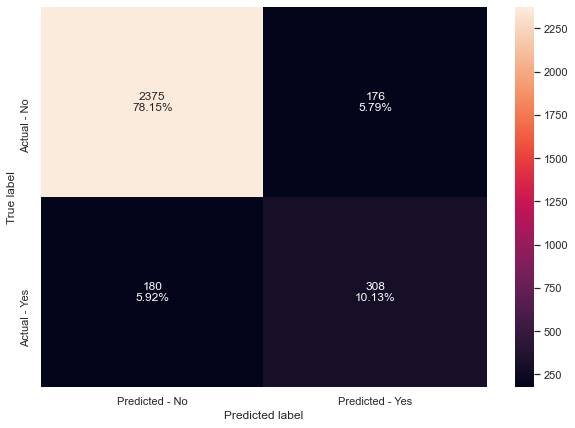

In [110]:
#Fitting the model
d_tree = DecisionTreeClassifier(random_state=1)
d_tree.fit(X_train,y_train)

#Calculating different metrics
get_metrics_score(d_tree,X_train,X_test,y_train,y_test)

#Creating confusion matrix
make_confusion_matrix(d_tree,y_test)

In [111]:
feature_names = list(X_train.columns)
print(feature_names)

['Dependent_count', 'Months_Inactive_12_mon', 'Contacts_Count_12_mon', 'Avg_Open_To_Buy', 'Total_Trans_Amt', 'Avg_Utilization_Ratio', 'Gender_M', 'Education_Level_Doctorate', 'Education_Level_Graduate', 'Education_Level_High School', 'Education_Level_Post-Graduate', 'Education_Level_Uneducated', 'Marital_Status_Married', 'Marital_Status_Single', 'Income_Category_$40K - $60K', 'Income_Category_$60K - $80K', 'Income_Category_$80K - $120K', 'Income_Category_Less than $40K', 'Card_Category_Gold', 'Card_Category_Platinum', 'Card_Category_Silver']


In [112]:
# importance of features in the tree building

print(pd.DataFrame(d_tree.feature_importances_, columns = ["Imp"], index = X_train.columns).sort_values(by = 'Imp', ascending = False))

                                     Imp
Total_Trans_Amt                 0.375560
Avg_Utilization_Ratio           0.231882
Avg_Open_To_Buy                 0.118070
Contacts_Count_12_mon           0.049769
Months_Inactive_12_mon          0.049742
Dependent_count                 0.046163
Gender_M                        0.022640
Education_Level_Uneducated      0.013872
Income_Category_Less than $40K  0.011865
Marital_Status_Single           0.010424
Income_Category_$60K - $80K     0.010136
Income_Category_$80K - $120K    0.009477
Education_Level_Graduate        0.008569
Education_Level_High School     0.006658
Marital_Status_Married          0.006341
Education_Level_Post-Graduate   0.006273
Card_Category_Silver            0.005912
Education_Level_Doctorate       0.005863
Income_Category_$40K - $60K     0.004609
Card_Category_Gold              0.004168
Card_Category_Platinum          0.002008


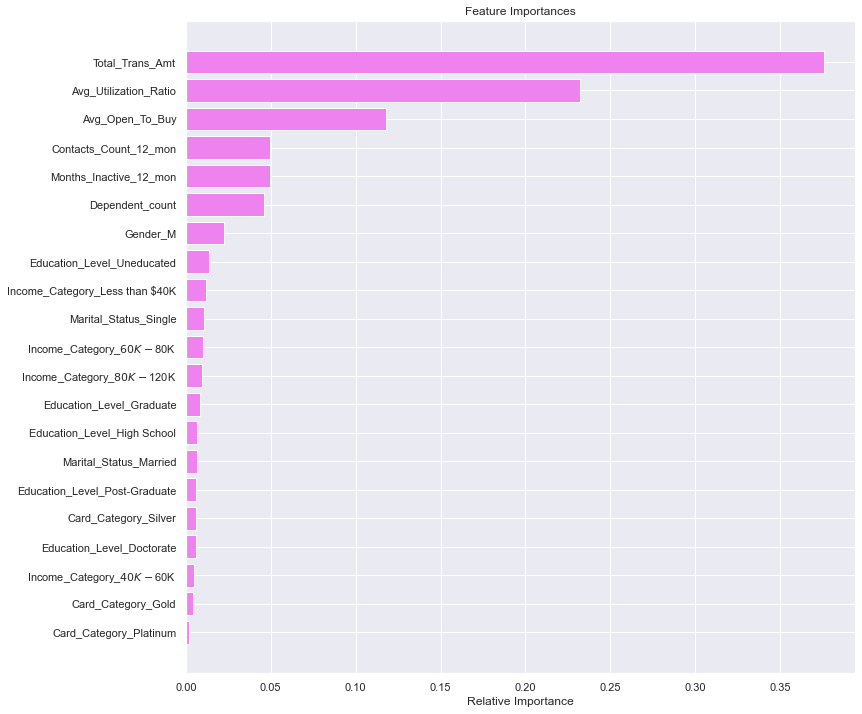

In [113]:
importances = d_tree.feature_importances_
indices = np.argsort(importances)

plt.figure(figsize=(12,12))
plt.title('Feature Importances')
plt.barh(range(len(indices)), importances[indices], color='violet', align='center')
plt.yticks(range(len(indices)), [feature_names[i] for i in indices])
plt.xlabel('Relative Importance')
plt.show()

* Total Transaction Amount and Average Utilization Ratio of credit card are the top significant features that play a vital role in predicting whether a customer will churn or not

### Random Forest

Accuracy on training set :  1.0
Accuracy on test set :  0.9075353734781179
Recall on training set :  1.0
Recall on test set :  0.5348360655737705
Precision on training set :  1.0
Precision on test set :  0.8285714285714286


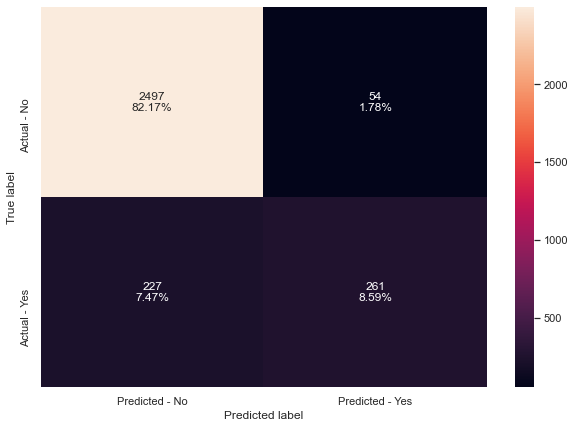

In [114]:
#Fitting the model
rf_estimator = RandomForestClassifier(random_state=1)
rf_estimator.fit(X_train,y_train)

#Calculating different metrics
get_metrics_score(rf_estimator,X_train,X_test,y_train,y_test)

#Creating confusion matrix
make_confusion_matrix(rf_estimator,y_test)

In [115]:
# importance of features in the tree building ( The importance of a feature is computed as the 
#(normalized) total reduction of the criterion brought by that feature. It is also known as the Gini importance )

print (pd.DataFrame(rf_estimator.feature_importances_, columns = ["Imp"], index = X_train.columns).sort_values(by = 'Imp', ascending = False))

                                     Imp
Total_Trans_Amt                 0.350831
Avg_Utilization_Ratio           0.176457
Avg_Open_To_Buy                 0.132723
Contacts_Count_12_mon           0.071604
Months_Inactive_12_mon          0.059719
Dependent_count                 0.054334
Gender_M                        0.019488
Education_Level_Graduate        0.014588
Marital_Status_Married          0.014141
Marital_Status_Single           0.013904
Education_Level_High School     0.013486
Income_Category_Less than $40K  0.012016
Education_Level_Uneducated      0.011220
Income_Category_$40K - $60K     0.011107
Income_Category_$80K - $120K    0.010696
Income_Category_$60K - $80K     0.009356
Education_Level_Post-Graduate   0.007769
Card_Category_Silver            0.006448
Education_Level_Doctorate       0.005975
Card_Category_Gold              0.002880
Card_Category_Platinum          0.001256


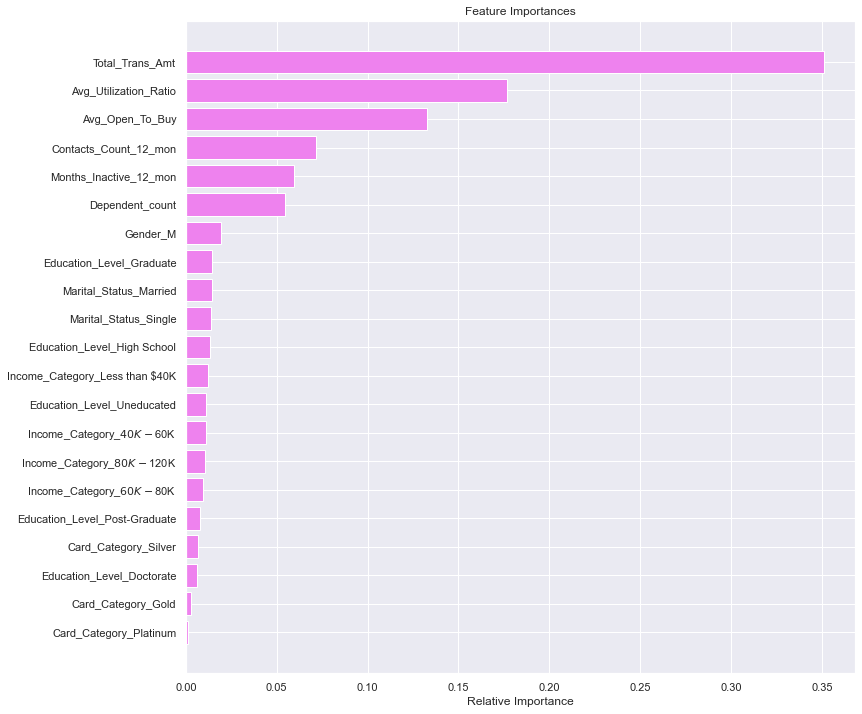

In [116]:
importances = rf_estimator.feature_importances_
indices = np.argsort(importances)

plt.figure(figsize=(12,12))
plt.title('Feature Importances')
plt.barh(range(len(indices)), importances[indices], color='violet', align='center')
plt.yticks(range(len(indices)), [feature_names[i] for i in indices])
plt.xlabel('Relative Importance')
plt.show()

- The top significant features in random forest turned out to be Total Transaction Amount, Average Utilization Ratio and Average Open to Buy amount.

### Bagging classifier

Accuracy on training set :  0.9915349887133182
Accuracy on test set :  0.9095097071405067
Recall on training set :  0.9552238805970149
Recall on test set :  0.6147540983606558
Precision on training set :  0.99179580674567
Precision on test set :  0.7751937984496124


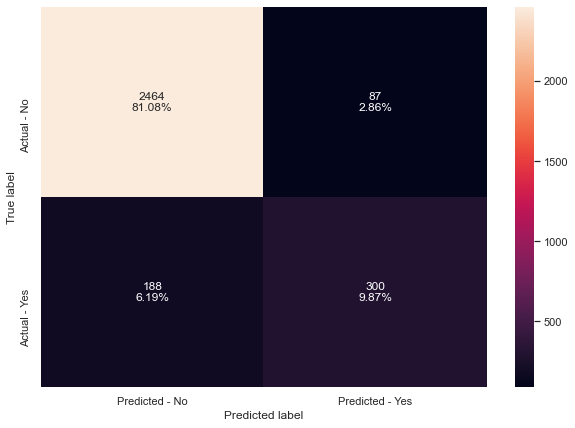

In [117]:
#Fitting the model
bagging_classifier = BaggingClassifier(random_state=1)
bagging_classifier.fit(X_train,y_train)

#Calculating different metrics
get_metrics_score(bagging_classifier,X_train,X_test,y_train,y_test)

#Creating confusion matrix
make_confusion_matrix(bagging_classifier,y_test)

### AdaBoost Classifier

Accuracy on training set :  0.9087189616252822
Accuracy on test set :  0.9065482066469234
Recall on training set :  0.5926251097453907
Recall on test set :  0.555327868852459
Precision on training set :  0.7867132867132867
Precision on test set :  0.8017751479289941


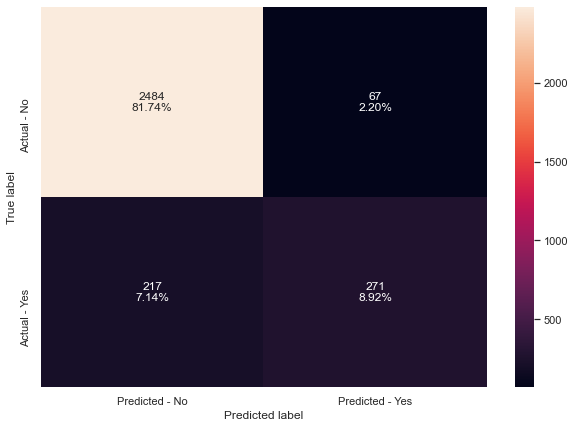

In [118]:
#Fitting the model
ab_classifier = AdaBoostClassifier(random_state=1)
ab_classifier.fit(X_train,y_train)

#Calculating different metrics
get_metrics_score(ab_classifier,X_train,X_test,y_train,y_test)

#Creating confusion matrix
make_confusion_matrix(ab_classifier,y_test)

### Gradient Boost Classifier

Accuracy on training set :  0.9238148984198645
Accuracy on test set :  0.9137874300756827
Recall on training set :  0.6549604916593503
Recall on test set :  0.5901639344262295
Precision on training set :  0.8353863381858903
Precision on test set :  0.8228571428571428


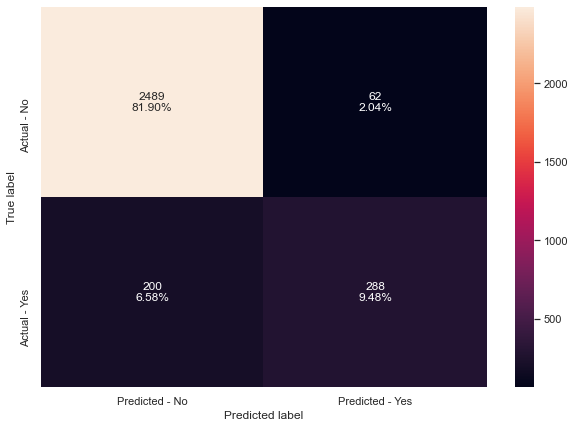

In [119]:
#Fitting the model
gb_classifier = GradientBoostingClassifier(random_state=1)
gb_classifier.fit(X_train,y_train)

#Calculating different metrics
get_metrics_score(gb_classifier,X_train,X_test,y_train,y_test)

#Creating confusion matrix
make_confusion_matrix(gb_classifier,y_test)

### XGBoost Classifier

Accuracy on training set :  0.9868792325056434
Accuracy on test set :  0.924646265218822
Recall on training set :  0.9420544337137841
Recall on test set :  0.6967213114754098
Precision on training set :  0.9754545454545455
Precision on test set :  0.8076009501187649


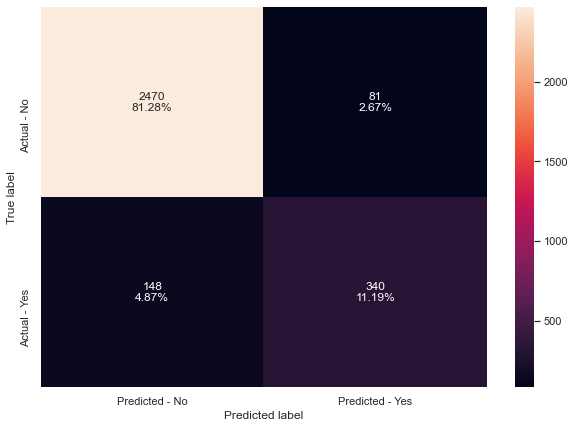

In [120]:
#Fitting the model
xgb_classifier = XGBClassifier(random_state=1,eval_metric = 'logloss')
xgb_classifier.fit(X_train,y_train)

#Calculating different metrics
get_metrics_score(xgb_classifier,X_train,X_test,y_train,y_test)

#Creating confusion matrix
make_confusion_matrix(xgb_classifier,y_test)

**Let's start by building different models using KFold and cross_val_score with pipelines and tune the best model using GridSearchCV and RandomizedSearchCV**

### Stratified K-fold Cross Validation

In [121]:
models = []  # Empty list to store all the models

# Appending pipelines for each model into the list
models.append(
    (
        "LR",
        Pipeline(
            steps=[
                ("scaler", StandardScaler()),
                ("log_reg", LogisticRegression(random_state=1)),
            ]
        ),
    )
)
models.append(
    (
        "RF",
        Pipeline(
            steps=[
                ("scaler", StandardScaler()),
                ("random_forest", RandomForestClassifier(random_state=1)),
            ]
        ),
    )
)
models.append(
    (
        "GBM",
        Pipeline(
            steps=[
                ("scaler", StandardScaler()),
                ("gradient_boosting", GradientBoostingClassifier(random_state=1)),
            ]
        ),
    )
)
models.append(
    (
        "ADB",
        Pipeline(
            steps=[
                ("scaler", StandardScaler()),
                ("adaboost", AdaBoostClassifier(random_state=1)),
            ]
        ),
    )
)
models.append(
    (
        "XGB",
        Pipeline(
            steps=[
                ("scaler", StandardScaler()),
                ("xgboost", XGBClassifier(random_state=1,eval_metric='logloss')),
            ]
        ),
    )
)
models.append(
    (
        "DTREE",
        Pipeline(
            steps=[
                ("scaler", StandardScaler()),
                ("decision_tree", DecisionTreeClassifier(random_state=1)),
            ]
        ),
    )
)

results = []  # Empty list to store all model's CV scores
names = []  # Empty list to store name of the models

# loop through all models to get the mean cross validated score
for name, model in models:
    scoring = "recall"
    kfold = StratifiedKFold(
        n_splits=5, shuffle=True, random_state=1
    )  # Setting number of splits equal to 5
    cv_result = cross_val_score(
        estimator=model, X=X_train, y=y_train, scoring=scoring, cv=kfold
    )
    results.append(cv_result)
    names.append(name)
    print("{}: {}".format(name, cv_result.mean() * 100))

LR: 19.052090578870082
RF: 54.96058428008347
GBM: 60.579642939949
ADB: 56.715743102249014
XGB: 66.55189736455677
DTREE: 61.37027591003943


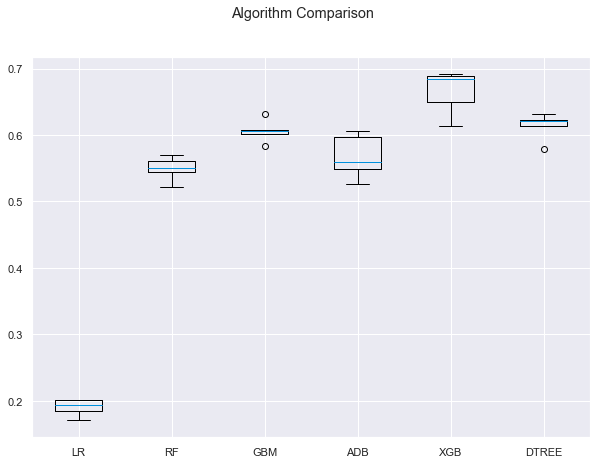

In [122]:
# Plotting boxplots for CV scores of all models defined above
fig = plt.figure(figsize=(10, 7))

fig.suptitle("Algorithm Comparison")
ax = fig.add_subplot(111)

plt.boxplot(results)
ax.set_xticklabels(names)

plt.show()

* We will be using AdaBoostClassifier, GradientBoostClassifier and DecisionTreeClassifier for hyperparameter tuning using GridSearchCV as their baseline models have a good recall. XGBoost has a better recall but tuning XGBoost with GridSearch CV can take many hours so, we are leaving out XGBoost and inclusing decision tree which has the next best recall after Adaboost and Gradient Boost
* We will be using XGBoost, AdaBoost and GradientBoost classifier to hypertune using RandomizedSearchCV as these are the models which had the better recall and hypertuning using RandomizedSearchCV takes less time as it fits 50(default n_iters value) from the entire hyperparameter space created by multiple hyper parameters supplied to the model.

## Hyperparameter Tuning - GridSearch CV

**We will use pipelines with StandardScaler and  AdaBoost model and tune the model using GridSearchCV**

**We can also use the make_pipeline function instead of Pipeline to create a pipeline.**

**`make_pipeline`: This is a shorthand for the Pipeline constructor; it does not require and does not permit, naming the estimators. Instead, their names will be set to the lowercase of their types automatically.**

* We will use AdaBoostClassifier, GradientBoostClassifier and Decision Tree models to hypertune using pipeline as these are the 3 models which have the better recall for the baseline model.

In [123]:
%%time 

# Creating pipeline
pipe = make_pipeline(StandardScaler(), AdaBoostClassifier(random_state=1))

# Parameter grid to pass in GridSearchCV
param_grid = {
    "adaboostclassifier__n_estimators": np.arange(10, 110, 10),
    "adaboostclassifier__learning_rate": [0.1, 0.01, 0.2, 0.05, 1],
    "adaboostclassifier__base_estimator": [DecisionTreeClassifier(max_depth=1, random_state=1),
        DecisionTreeClassifier(max_depth=2, random_state=1),
        DecisionTreeClassifier(max_depth=3, random_state=1),
    ],
}

# Type of scoring used to compare parameter combinations
scorer = metrics.make_scorer(metrics.recall_score)

# Calling GridSearchCV
grid_cv = GridSearchCV(estimator=pipe, param_grid=param_grid, scoring=scorer, cv=5, n_jobs = -1,verbose = 2)

# Fitting parameters in GridSeachCV
grid_cv.fit(X_train, y_train)

print(
    "Best Parameters:{} \nScore: {}".format(grid_cv.best_params_, grid_cv.best_score_)
)

Fitting 5 folds for each of 150 candidates, totalling 750 fits
Best Parameters:{'adaboostclassifier__base_estimator': DecisionTreeClassifier(max_depth=3, random_state=1), 'adaboostclassifier__learning_rate': 1, 'adaboostclassifier__n_estimators': 20} 
Score: 0.6707589458227066
Wall time: 4min 42s


In [124]:
# Creating new pipeline with best parameters
abc_tuned1 = make_pipeline(
    StandardScaler(),
    AdaBoostClassifier(
        base_estimator=DecisionTreeClassifier(max_depth=3, random_state=1),
        n_estimators=20,
        learning_rate=1,
        random_state=1,
    ),
)

# Fit the model on training data
abc_tuned1.fit(X_train, y_train)

Pipeline(steps=[('standardscaler', StandardScaler()),
                ('adaboostclassifier',
                 AdaBoostClassifier(base_estimator=DecisionTreeClassifier(max_depth=3,
                                                                          random_state=1),
                                    learning_rate=1, n_estimators=20,
                                    random_state=1))])

Accuracy on training set :  0.9287528216704289
Accuracy on test set :  0.8989799276077657
Recall on training set :  0.7287093942054433
Recall on test set :  0.6331967213114754
Precision on training set :  0.8089668615984406
Precision on test set :  0.7070938215102975


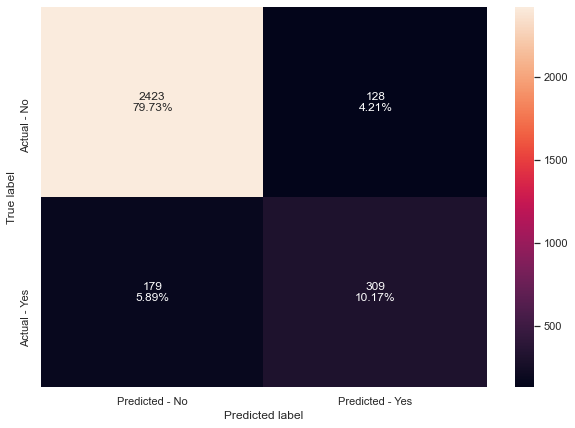

In [125]:
# Calculating different metrics
get_metrics_score(abc_tuned1,X_train,X_test,y_train,y_test)

# Creating confusion matrix
make_confusion_matrix(abc_tuned1, y_test)

### GradientBoostingClassifier - GridSearchCV

In [126]:
%%time 

# Creating pipeline
pipe = Pipeline(steps = [('scaler',StandardScaler()), ('gbm',GradientBoostingClassifier(random_state=1))])

# Parameter grid to pass in GridSearchCV
param_grid = {
    "gbm__n_estimators": [50,120,200],
    "gbm__subsample":[0.8,0.9,1],
    "gbm__learning_rate": [0.1, 0.01, 0.2, 0.05, 1],
    
}

# Type of scoring used to compare parameter combinations
scorer = metrics.make_scorer(metrics.recall_score)

# Calling GridSearchCV
grid_cv = GridSearchCV(estimator=pipe, param_grid=param_grid, scoring=scorer, cv=5, n_jobs = -1,verbose = 2)

# Fitting parameters in GridSeachCV
grid_cv.fit(X_train, y_train)

print(
    "Best Parameters:{} \nScore: {}".format(grid_cv.best_params_, grid_cv.best_score_)
)

Fitting 5 folds for each of 45 candidates, totalling 225 fits
Best Parameters:{'gbm__learning_rate': 0.2, 'gbm__n_estimators': 200, 'gbm__subsample': 0.8} 
Score: 0.6540768220109745
Wall time: 2min 56s


**Fitting the gradient boosting classifier with best parameters obtained from GridSearchCV**

In [127]:
# Creating new pipeline with best parameters
gbm_tuned = make_pipeline(
    StandardScaler(),
    GradientBoostingClassifier(n_estimators=200,
        learning_rate=0.2,
        subsample = 0.8,
        random_state=1,
    ),
)

# Fit the model on training data
gbm_tuned.fit(X_train, y_train)

Pipeline(steps=[('standardscaler', StandardScaler()),
                ('gradientboostingclassifier',
                 GradientBoostingClassifier(learning_rate=0.2, n_estimators=200,
                                            random_state=1, subsample=0.8))])

Accuracy on training set :  0.9613431151241535
Accuracy on test set :  0.916419874958868
Recall on training set :  0.8331870061457419
Recall on test set :  0.6577868852459017
Precision on training set :  0.9186834462729913
Precision on test set :  0.7867647058823529


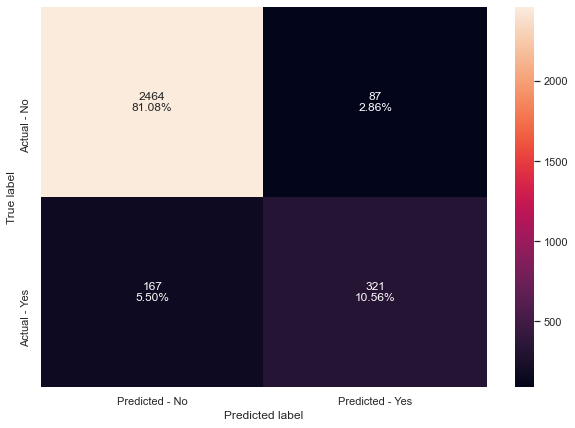

In [128]:
# Calculating different metrics
get_metrics_score(gbm_tuned,X_train,X_test,y_train,y_test)

# Creating confusion matrix
make_confusion_matrix(gbm_tuned, y_test)

### DecisionTreeClassifier - GridSearchCV

In [129]:
%%time 

# Creating pipeline
pipe = make_pipeline(StandardScaler(), DecisionTreeClassifier(random_state=1))

# Parameter grid to pass in GridSearchCV
param_grid = {
    "decisiontreeclassifier__max_depth": np.arange(2,20),
    "decisiontreeclassifier__min_samples_leaf": [1, 3, 5, 7, 10],
    "decisiontreeclassifier__max_leaf_nodes" : [2, 3, 5, 10,15],
    "decisiontreeclassifier__min_impurity_decrease": [0.001,0.01,0.1,0.0],
}

# Type of scoring used to compare parameter combinations
scorer = metrics.make_scorer(metrics.recall_score)

# Calling GridSearchCV
grid_cv = GridSearchCV(estimator=pipe, param_grid=param_grid, scoring=scorer, cv=5, n_jobs = -1,verbose = 2)

# Fitting parameters in GridSeachCV
grid_cv.fit(X_train, y_train)

print(
    "Best Parameters:{} \nScore: {}".format(grid_cv.best_params_, grid_cv.best_score_)
)

Fitting 5 folds for each of 1800 candidates, totalling 9000 fits
Best Parameters:{'decisiontreeclassifier__max_depth': 6, 'decisiontreeclassifier__max_leaf_nodes': 15, 'decisiontreeclassifier__min_impurity_decrease': 0.001, 'decisiontreeclassifier__min_samples_leaf': 1} 
Score: 0.6751719607388516
Wall time: 2min 26s


In [130]:
# Creating new pipeline with best parameters
dtree_tuned = make_pipeline(
    StandardScaler(),
    DecisionTreeClassifier(max_depth = 6,
        max_leaf_nodes = 15,
        min_impurity_decrease = 0.001,
        min_samples_leaf = 1,
        random_state=1,
    ),
)

# Fit the model on training data
dtree_tuned.fit(X_train, y_train)

Pipeline(steps=[('standardscaler', StandardScaler()),
                ('decisiontreeclassifier',
                 DecisionTreeClassifier(max_depth=6, max_leaf_nodes=15,
                                        min_impurity_decrease=0.001,
                                        random_state=1))])

Accuracy on training set :  0.9053329571106095
Accuracy on test set :  0.8910825929582099
Recall on training set :  0.6962247585601404
Recall on test set :  0.6536885245901639
Precision on training set :  0.7093023255813954
Precision on test set :  0.6632016632016632


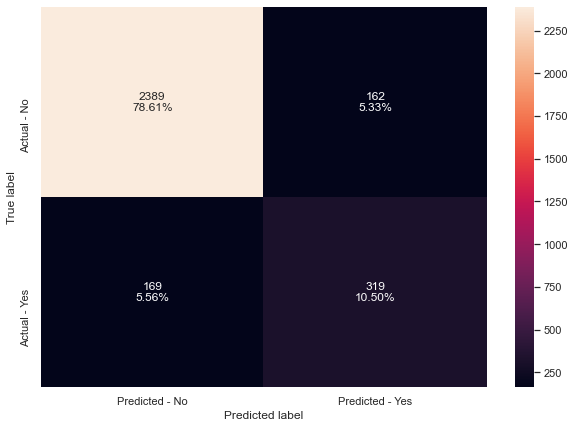

In [131]:
# Calculating different metrics
get_metrics_score(dtree_tuned,X_train,X_test,y_train,y_test)

# Creating confusion matrix
make_confusion_matrix(dtree_tuned, y_test)

## Hyperparameter Tuning - RandomizedSearchCV

**We will use pipeline with StandardScaler and XGBClassifier and tune model using RandomizedSearchCV**

In [132]:
%%time 

#Creating pipeline
pipe=make_pipeline(StandardScaler(),XGBClassifier(random_state=1,eval_metric='logloss', n_estimators = 50))

#Parameter grid to pass in RandomizedSearchCV
param_grid={'xgbclassifier__n_estimators':np.arange(50,300,50),
            'xgbclassifier__scale_pos_weight':[0,1,2,5,10],
            'xgbclassifier__learning_rate':[0.01,0.1,0.2,0.05],
            'xgbclassifier__gamma':[0,1,3,5],
            'xgbclassifier__subsample':[0.7,0.8,0.9,1],
           'xgbclassifier__max_depth':np.arange(1,10,1),
            'xgbclassifier__reg_lambda':[0,1,2,5,10]}





# Type of scoring used to compare parameter combinations
scorer = metrics.make_scorer(metrics.recall_score)

#Calling RandomizedSearchCV
randomized_cv = RandomizedSearchCV(estimator=pipe, param_distributions=param_grid, n_iter=50, scoring=scorer, cv=5, random_state=1)

#Fitting parameters in RandomizedSearchCV
randomized_cv.fit(X_train,y_train)

print("Best parameters are {} with CV score={}:" .format(randomized_cv.best_params_,randomized_cv.best_score_))

Best parameters are {'xgbclassifier__subsample': 1, 'xgbclassifier__scale_pos_weight': 10, 'xgbclassifier__reg_lambda': 2, 'xgbclassifier__n_estimators': 250, 'xgbclassifier__max_depth': 1, 'xgbclassifier__learning_rate': 0.05, 'xgbclassifier__gamma': 1} with CV score=0.9473413710487673:
Wall time: 5min 28s


In [133]:
# Creating new pipeline with best parameters
xgb_tuned = make_pipeline(
    StandardScaler(),
    XGBClassifier(subsample = 1,
        scale_pos_weight = 10,
        reg_lambda = 2,
        n_estimators = 250,
        learning_rate = 0.05,
        gamma = 1,
        eval_metric = 'logloss',
        random_state=1,
    ),
)

# Fit the model on training data
xgb_tuned.fit(X_train, y_train)

Pipeline(steps=[('standardscaler', StandardScaler()),
                ('xgbclassifier',
                 XGBClassifier(base_score=0.5, booster='gbtree',
                               colsample_bylevel=1, colsample_bynode=1,
                               colsample_bytree=1, eval_metric='logloss',
                               gamma=1, gpu_id=-1, importance_type='gain',
                               interaction_constraints='', learning_rate=0.05,
                               max_delta_step=0, max_depth=6,
                               min_child_weight=1, missing=nan,
                               monotone_constraints='()', n_estimators=250,
                               n_jobs=4, num_parallel_tree=1, random_state=1,
                               reg_alpha=0, reg_lambda=2, scale_pos_weight=10,
                               subsample=1, tree_method='exact',
                               validate_parameters=1, verbosity=None))])

Accuracy on training set :  0.9118227990970654
Accuracy on test set :  0.8696939782823297
Recall on training set :  0.9947322212467077
Recall on test set :  0.9159836065573771
Precision on training set :  0.646689497716895
Precision on test set :  0.557356608478803


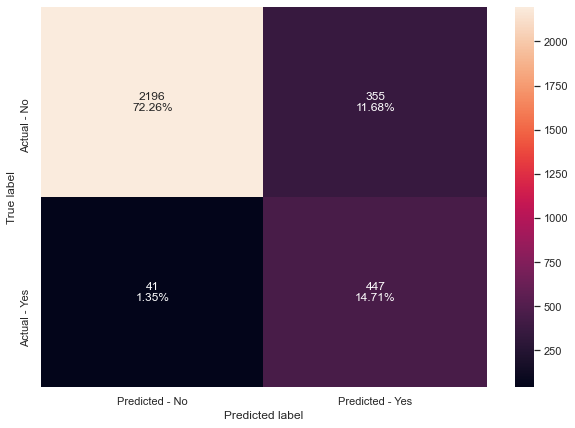

In [134]:
# Calculating different metrics
get_metrics_score(xgb_tuned,X_train,X_test,y_train,y_test)

# Creating confusion matrix
make_confusion_matrix(xgb_tuned, y_test)

**We will use pipeline with StandardScaler and AdaBoostClassifier and tune model using RandomizedSearchCV**

In [135]:
%%time 

# Creating pipeline
pipe = make_pipeline(StandardScaler(), AdaBoostClassifier(random_state=1))

# Parameter grid to pass in RandomizedSearchCV
param_grid = {
    "adaboostclassifier__n_estimators": np.arange(10, 150, 10),
    "adaboostclassifier__learning_rate": np.arange(0.1,2,0.1),
    "adaboostclassifier__base_estimator": [DecisionTreeClassifier(max_depth=1, random_state=1),
        DecisionTreeClassifier(max_depth=2, random_state=1),
        DecisionTreeClassifier(max_depth=3, random_state=1)
    ],
}

# Type of scoring used to compare parameter combinations
scorer = metrics.make_scorer(metrics.recall_score)

# Calling RandomizedSearchCV
random_cv = RandomizedSearchCV(estimator=pipe, param_distributions=param_grid, scoring=scorer, cv=5, n_jobs = -1,verbose = 2)

# Fitting parameters in GridSeachCV
random_cv.fit(X_train, y_train)

print(
    "Best Parameters:{} \nScore: {}".format(random_cv.best_params_, random_cv.best_score_)
)

Fitting 5 folds for each of 10 candidates, totalling 50 fits
Best Parameters:{'adaboostclassifier__n_estimators': 40, 'adaboostclassifier__learning_rate': 1.1, 'adaboostclassifier__base_estimator': DecisionTreeClassifier(max_depth=3, random_state=1)} 
Score: 0.6628680732668676
Wall time: 26.9 s


In [136]:
# Creating new pipeline with best parameters
abc_randtuned = make_pipeline(
    StandardScaler(),
    AdaBoostClassifier(
        base_estimator=DecisionTreeClassifier(max_depth=2, random_state=1),
        n_estimators=700,
        learning_rate=1.8000000000000003,
        random_state=1,
    ),
)

# Fit the model on training data
abc_randtuned.fit(X_train, y_train)

Pipeline(steps=[('standardscaler', StandardScaler()),
                ('adaboostclassifier',
                 AdaBoostClassifier(base_estimator=DecisionTreeClassifier(max_depth=2,
                                                                          random_state=1),
                                    learning_rate=1.8000000000000003,
                                    n_estimators=700, random_state=1))])

Accuracy on training set :  0.9988713318284425
Accuracy on test set :  0.9035867061533399
Recall on training set :  0.9938542581211589
Recall on test set :  0.6598360655737705
Precision on training set :  0.999117387466902
Precision on test set :  0.7171492204899778


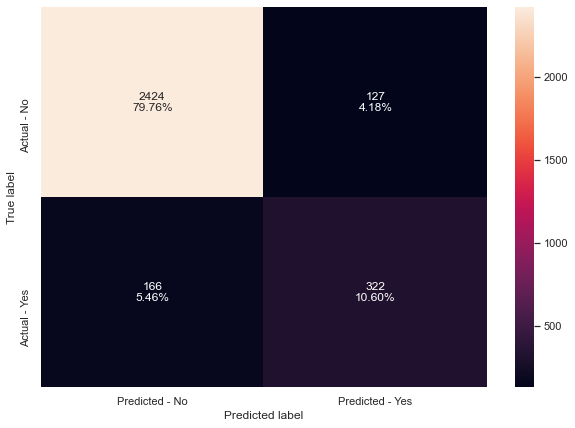

In [137]:
# Calculating different metrics
get_metrics_score(abc_randtuned,X_train,X_test,y_train,y_test)

# Creating confusion matrix
make_confusion_matrix(abc_randtuned, y_test)

### Gradient Boosting - RandomizedSearchCV

In [138]:
%%time 

# Creating pipeline
pipe = Pipeline(steps = [('scaler',StandardScaler()), ('gbm',GradientBoostingClassifier(random_state=1))])

# Parameter grid to pass in GridSearchCV
param_grid = {
    "gbm__n_estimators": np.arange(50,200,25),
    "gbm__subsample":[0.8,0.9,1],
    "gbm__max_features": [0.7,0.8,0.9,1],
    "gbm__min_samples_leaf":np.arange(0,15,1),
    "gbm__learning_rate": [0.1, 0.01, 0.2, 0.05, 1],
    
}

# Type of scoring used to compare parameter combinations
scorer = metrics.make_scorer(metrics.recall_score)

# Calling GridSearchCV
random_cv = RandomizedSearchCV(estimator=pipe, param_distributions=param_grid, scoring=scorer, cv=5, n_jobs = -1,verbose = 2)

# Fitting parameters in GridSeachCV
random_cv.fit(X_train, y_train)

print(
    "Best Parameters:{} \nScore: {}".format(random_cv.best_params_, random_cv.best_score_)
)

Fitting 5 folds for each of 10 candidates, totalling 50 fits
Best Parameters:{'gbm__subsample': 0.8, 'gbm__n_estimators': 75, 'gbm__min_samples_leaf': 14, 'gbm__max_features': 0.8, 'gbm__learning_rate': 1} 
Score: 0.669912667130381
Wall time: 21.4 s


In [139]:
# Creating new pipeline with best parameters
gbm_randtuned = make_pipeline(
    StandardScaler(),
    GradientBoostingClassifier(
        n_estimators=125,
        learning_rate=0.2,
        subsample = 0.9,
        min_samples_leaf = 4,
        max_features = 0.8,
        random_state=1,
    ),
)

# Fit the model on training data
gbm_randtuned.fit(X_train, y_train)

Pipeline(steps=[('standardscaler', StandardScaler()),
                ('gradientboostingclassifier',
                 GradientBoostingClassifier(learning_rate=0.2, max_features=0.8,
                                            min_samples_leaf=4,
                                            n_estimators=125, random_state=1,
                                            subsample=0.9))])

Accuracy on training set :  0.9414503386004515
Accuracy on test set :  0.9157617637380717
Recall on training set :  0.742756804214223
Recall on test set :  0.6311475409836066
Precision on training set :  0.8739669421487604
Precision on test set :  0.8020833333333334


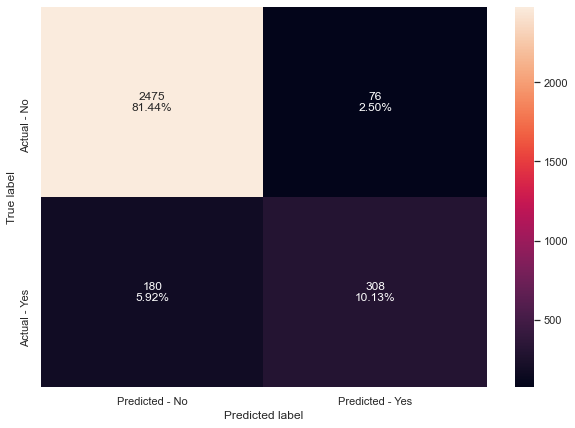

In [140]:
# Calculating different metrics
get_metrics_score(gbm_randtuned,X_train,X_test,y_train,y_test)

# Creating confusion matrix
make_confusion_matrix(gbm_randtuned, y_test)

### Comparing Hypertuned models

In [141]:
# defining list of models
models = [abc_tuned1, gbm_tuned,dtree_tuned, xgb_tuned, abc_randtuned,gbm_randtuned]

# defining empty lists to add train and test results
acc_train = []
acc_test = []
recall_train = []
recall_test = []
precision_train = []
precision_test = []

# looping through all the models to get the metrics score - Accuracy, Recall and Precision
for model in models:

    j = get_metrics_score(model,X_train,X_test,y_train,y_test, False)
    acc_train.append(j[0])
    acc_test.append(j[1])
    recall_train.append(j[2])
    recall_test.append(j[3])
    precision_train.append(j[4])
    precision_test.append(j[5])

In [142]:
comparison_frame = pd.DataFrame(
    {
        "Model": [
            "Adaboost with GridSearchCV",
            "Gradientboost with GridSearchCV",
            "Decision Tree with GridSearchCV",
            "XGBoost with RandomizedSearchCV",
            "Adaboost with RandomizedSearchCV",
            "Gradientboost with RandomizedSearchCV",
    
        ],
        "Train_Accuracy": acc_train,
        "Test_Accuracy": acc_test,
        "Train_Recall": recall_train,
        "Test_Recall": recall_test,
        "Train_Precision": precision_train,
        "Test_Precision": precision_test,
    }
)

# Sorting models in decreasing order of test recall
comparison_frame.sort_values(by="Test_Recall", ascending=False)

,Model,Train_Accuracy,Test_Accuracy,Train_Recall,Test_Recall,Train_Precision,Test_Precision
3,XGBoost with RandomizedSearchCV,0.911823,0.869694,0.994732,0.915984,0.646689,0.557357
4,Adaboost with RandomizedSearchCV,0.998871,0.903587,0.993854,0.659836,0.999117,0.717149
1,Gradientboost with GridSearchCV,0.961343,0.916420,0.833187,0.657787,0.918683,0.786765
2,Decision Tree with GridSearchCV,0.905333,0.891083,0.696225,0.653689,0.709302,0.663202
0,Adaboost with GridSearchCV,0.928753,0.898980,0.728709,0.633197,0.808967,0.707094
5,Gradientboost with RandomizedSearchCV,0.941450,0.915762,0.742757,0.631148,0.873967,0.802083


* XGBoost with randomized search has given the best recall of 92% on test

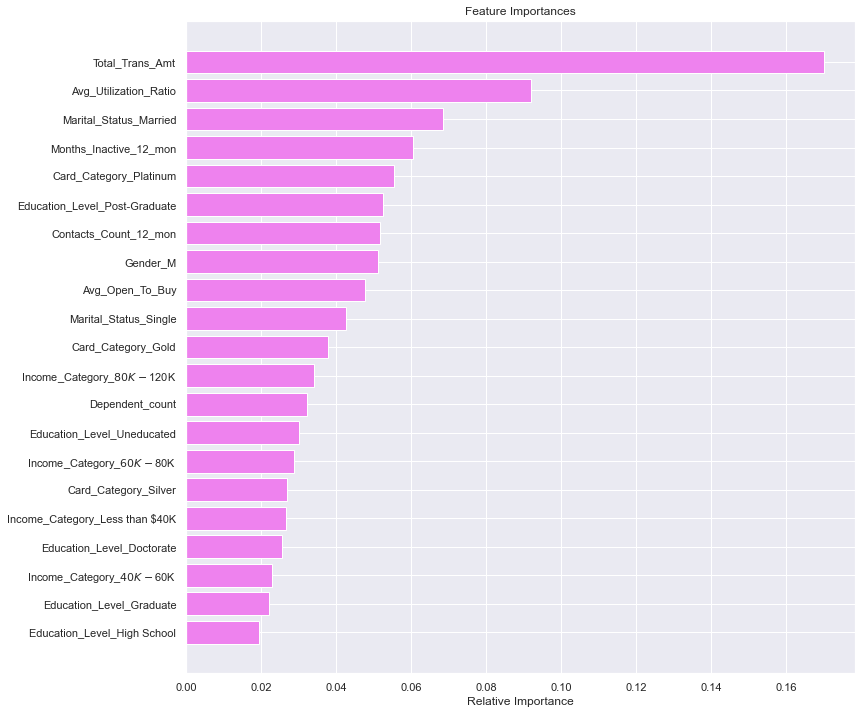

In [143]:
feature_names = X_train.columns
importances = xgb_tuned[1].feature_importances_
indices = np.argsort(importances)

plt.figure(figsize=(12, 12))
plt.title("Feature Importances")
plt.barh(range(len(indices)), importances[indices], color="violet", align="center")
plt.yticks(range(len(indices)), [feature_names[i] for i in indices])
plt.xlabel("Relative Importance")
plt.show()

- The top 3 significant features turned out to be Total Transaction Amount, Average Utilization Ratio and Marital Status Married

## Insights and Business Recommendations:
1. We have built several models to try and predict whether a customer would churn and identify the significant features that would help the bank identify customers who are about to churn.
2. Recall (True Positive rate) is considered main performance metric as the company doesnot want to lose a potential customer.
3. Total transaction amount turned out to be a significant factor which means if a customer is spending transaction amount on credit card, they might be interested in using credit card which reduces the churning percentage of the customer
4. Average utilization ratio also turned out to be a significant factor which will be between 0 and 1, the closer a customer's average utilization ratio is to 1, the higher the chances of a customer not churning.
5. If a customer is earning less than 40K, the chances of a customer leaving credit card services decreases by 1.18 times or 38%.
6. If we have other information about the customer like whether they have a mortgage with the bank or having a personal loan can help us better analyze the data and attract customers with better rates and bundle offers.